**Table of Content:**

    1. Importing libraries
    2. Importing data
    3. Addressing PII
    4. Defining visualization settings
    5. Regional segmentation
        5.1 Creating a 'region' flag
        5.2 Ordering habits
            5.2.1 Calculating relative order frequency
            5.2.2 Visualizing order frequency
        5.3 Spending habits
            5.3.1 Calculating relative spendings
            5.3.2 Visualizing spending patterns
    6. Exclusion flag
    7. Temporal analysis
        7.1 Busiest hours of the day
        7.2 Busiest days of the week
        7.3 Most money spent
    8. Loyalty status
        8.1 Order frequency
        8.2 Ordering habits
            8.2.1 Calculating relative order frequency
            8.2.2 Visualizing order frequency
        8.3 Spending habits
            8.3.1 Calculating relative spendings
            8.3.2 Visualizing spending patterns
    9. Popular products
    10. Prices
        10.1 Price frequencies
        10.2 Price ranges
    11. Customer profiling
        11.1 family_status
            11.1.1 Creating variable 'age_range'
            11.1.2 'family_status vs. age'
            11.1.3 'family_status vs. dependants'
        11.2 demographic_profile
            11.2.1 Defining profile
            11.2.2 Visualizing profile distribution
            11.2.3 Usage frequency
                Descriptive statistics
                Visualizing frequency_flag
            11.2.4 Expenditure
                Descriptive statistics
                Visualizing spending_flag
            11.2.5 Comparison across regions
            11.2.6 Comparison across departments
                Determining the Top 5 departments
                Visualizing the Top 5 departments
            11.2.7 Timelines
                Hour of the day
                Day of the week
        11.3 income_profile
            11.3.1 Defining profile
            11.3.2 Visualizing profile distribution
                Relative order frequency
                Share of income by demographic profile
            11.3.3 Descriptive statistics
                Usage frequency
                Visualizing usage frequency
                Expenditure
            11.3.4 Comparison across departments
                Determing Top 5 departments
                Visualizing Top 5 departments
            11.3.5 Comparison across price ranges
                Calculating share of price ranges
                Visualizing share of price ranges
            11.3.6 Comparing spendings
                Calculating share of spendings
                Visualizing share of spendings
        11.4 time_profile
            11.4.1 Defining profile
            11.4.2 Visualizing profile distribution
            11.4.3 Descriptive statistics
                Usage frequency
                Expenditure
        11.5 special goods
            11.5.1 Defining profile
            11.5.2 Visualizing profile distribution
            11.5.3 Descriptive statistics
                Usage frequency
                Expenditure
    12. Exporting data

# 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import scipy

# 2. Importing data

In [2]:
# Turn project folder path into a string
path = r'/Users/sarahtischer/Desktop/CareerFoundry/Data Immersion/Achievement 4/01-2024_Instacart_Basket_Analysis'

In [3]:
# Import "orders_products_customers_merged.pkl"
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check the output
df.shape

(32404859, 31)

In [5]:
# Check the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            object  
 2   department_id           int8    
 3   prices                  float32 
 4   order_id                int32   
 5   user_id                 object  
 6   order_number            int8    
 7   order_day_of_week       int8    
 8   order_hour_of_day       int8    
 9   days_since_prior_order  float32 
 10  add_to_cart_order       int16   
 11  reordered               int8    
 12  price_range             object  
 13  busiest_days            object  
 14  busiest_period_of_day   object  
 15  max_order               int8    
 16  loyalty_flag            object  
 17  avg_price               float16 
 18  spending_flag           object  
 19  median_frequency        float16 
 20  frequency_flag          object  
 21  first_

In [6]:
# Check first 5 rows of the dataframe
df.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,first_name,last_name,gender,state,age,date_joined,dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,12,20.0,3160996,138,1,5,13,NaN,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,12,20.0,2254091,138,10,5,14,6.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,10,12.9,505689,138,9,6,12,7.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


In [7]:
# Drop redundant column '_merge'
df = df.drop(columns = ['_merge'])

In [8]:
# Import "departments_wrangled.csv"
df_dep = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_data', 'departments_wrangled.csv'))

In [9]:
# Check the output
df_dep.shape

(21, 2)

In [10]:
# Check the dataframe
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [11]:
# Rename index column to 'department_id'
df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [12]:
# Check the new dataframe
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [13]:
%%time
# Merge df_dep into df
df = df.merge(df_dep, on='department_id', indicator=True)

CPU times: user 31.5 s, sys: 1min 13s, total: 1min 44s
Wall time: 3min


In [14]:
# Check frequencies of the _merge flag
df['_merge'].value_counts(dropna=False)

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [15]:
# Drop the _merge flag
df = df.drop(columns=['_merge'])

In [16]:
# Check first 5 rows of the dataframe
df.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,first_name,last_name,gender,state,age,date_joined,dependants,family_status,income,department
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,snacks
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,snacks
2,4913,Table Water Crackers,19,4.4,894221,138,23,5,13,24.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,snacks
3,11759,Organic Simply Naked Pita Chips,19,4.4,1986630,138,7,0,12,7.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,snacks
4,13424,Almonds,19,4.2,3139998,138,28,6,11,3.0,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,snacks


# 3. Addressing PII

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

Before proceeding with the analysis, it's important to recognize and address potential security implications related to personally identifiable information (PII) in the dataset. While removing the first_name and last_name columns is a critical step in minimizing PII exposure, it's important to recognize that other variables such as user_id, gender, age, date_joined, and income may still contain sensitive information.
Since the remaining data will only be used in grouped or aggregated formats, the focus shifts to ensuring that any analysis or sharing of the data does not inadvertently expose sensitive information. Therefore, the granularity of the analysis should be limited and it should be avoided to create overly detailed or fine-grained analyses that, when aggregated, could potentially reveal sensitive information.

**_______________________________________________________________________________________________________________**

In [17]:
# Drop columns 'first_name' and 'last_name' to remove PII
df_no_pii = df.drop(columns=['first_name', 'last_name'])

In [18]:
# Check first 5 rows of the dataframe
df_no_pii.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,median_frequency,frequency_flag,gender,state,age,date_joined,dependants,family_status,income,department
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks
2,4913,Table Water Crackers,19,4.4,894221,138,23,5,13,24.0,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks
3,11759,Organic Simply Naked Pita Chips,19,4.4,1986630,138,7,0,12,7.0,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks
4,13424,Almonds,19,4.2,3139998,138,28,6,11,3.0,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks


# 4. Defining visualization settings

In [19]:
# Define global settings
figsize=(10, 8)
fontname = 'Optima'
fontsize_title = 16
fontsize_label = 14
fontsize_tick = 12
fontsize_legend = 12
color_purple = '#800080'
color_orange = '#ffa500'
color_green = '#008000'

# Create a function to set common plot settings
def set_plot_settings(chart_type):
    plt.xticks(fontname=fontname, fontsize=fontsize_tick)
    plt.yticks(fontname=fontname, fontsize=fontsize_tick)
    plt.tick_params(axis='both', which='major')
    plt.tight_layout()
    
    if chart_type == 'horizontal':
        plt.grid(axis='x', linestyle='--', alpha=0.3) # Add grid lines
        plt.ticklabel_format(style='plain', axis='x') # Disable scientific notation on x-axis
    elif chart_type == 'vertical':
        plt.grid(axis='y', linestyle='--', alpha=0.3) # Add grid lines
        plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on y-axis
    else:
        pass
    
    # Set light grey background color
    plt.gca().set_facecolor('#e6e6e6')

# 5. Regional segmentation

## 5.1 Creating a 'region' flag

In [257]:
# Create list variables based on regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'
]
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
           'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota',
           'Iowa', 'Missouri'
]
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
         'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
         'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas',
         'Arkansas', 'Louisiana'
]
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah',
        'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington',
        'Oregon', 'California', 'Hawaii'
]

In [258]:
%%time
# Create a dictionary mapping each state to its corresponding region
region_mapping = {
    state: 'Northeast' for state in northeast
}
region_mapping.update({
    state: 'Midwest' for state in midwest
})
region_mapping.update({
    state: 'South' for state in south
})
region_mapping.update({
    state: 'West' for state in west
})

CPU times: user 47 µs, sys: 107 µs, total: 154 µs
Wall time: 691 µs


In [25]:
# Use map to apply the mapping to the 'state' column and create the 'region' column
df_no_pii['region'] = df_no_pii['state'].map(region_mapping)

In [26]:
# Check first 5 rows of the dataframe
df_no_pii.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,frequency_flag,gender,state,age,date_joined,dependants,family_status,income,department,region
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks,Midwest
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks,Midwest
2,4913,Table Water Crackers,19,4.4,894221,138,23,5,13,24.0,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks,Midwest
3,11759,Organic Simply Naked Pita Chips,19,4.4,1986630,138,7,0,12,7.0,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks,Midwest
4,13424,Almonds,19,4.2,3139998,138,28,6,11,3.0,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,snacks,Midwest


In [27]:
# Check a sample
df_no_pii[['state', 'region']].sample(20)

,state,region
12628652,Rhode Island,Northeast
5602536,Minnesota,Midwest
12166742,Missouri,Midwest
18217279,Wisconsin,Midwest
30498494,Arizona,West
12272116,Texas,South
21550469,Arizona,West
15783231,Alaska,West
3449758,Colorado,West
15130996,Florida,South


In [154]:
# Check frequencies of new column 'region'
df_no_pii['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [155]:
# Check metadata of new column 'region'
df_no_pii['region'].describe()

count     32404859
unique           4
top          South
freq      10791885
Name: region, dtype: object

## 5.2 Ordering habits

### 5.2.1 Calculating relative order frequency

In [175]:
# Create crosstab of 'region' and 'frequency_flag'
cross_region_freq = pd.crosstab(df_no_pii['region'], df_no_pii['frequency_flag'])

cross_region_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer,nan
region,,,,
Midwest,5017709,863419,1716197,0
Northeast,3804566,630182,1287988,0
South,7192372,1215088,2384420,5
West,5545206,927748,1819959,0


In [176]:
# Calculate the total count of usage frequencies
cross_region_freq['Total'] = cross_region_freq['Frequent customer'] + cross_region_freq['Non-frequent customer'] + cross_region_freq['Regular customer']

# Calculate the proportions of usage frequencies
cross_region_freq['Proportion frequent'] = cross_region_freq['Frequent customer'] / cross_region_freq['Total'] * 100
cross_region_freq['Proportion non-frequent'] = cross_region_freq['Non-frequent customer'] / cross_region_freq['Total'] * 100
cross_region_freq['Proportion regular'] = cross_region_freq['Regular customer'] / cross_region_freq['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_region_freq = cross_region_freq.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_region_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer,nan,Total,Proportion frequent,Proportion non-frequent,Proportion regular
region,,,,,,,,
South,7192372,1215088,2384420,5,10791880,66.65,11.26,22.09
West,5545206,927748,1819959,0,8292913,66.87,11.19,21.95
Midwest,5017709,863419,1716197,0,7597325,66.05,11.36,22.59
Northeast,3804566,630182,1287988,0,5722736,66.48,11.01,22.51


### 5.2.2 Visualizing relative order frequency

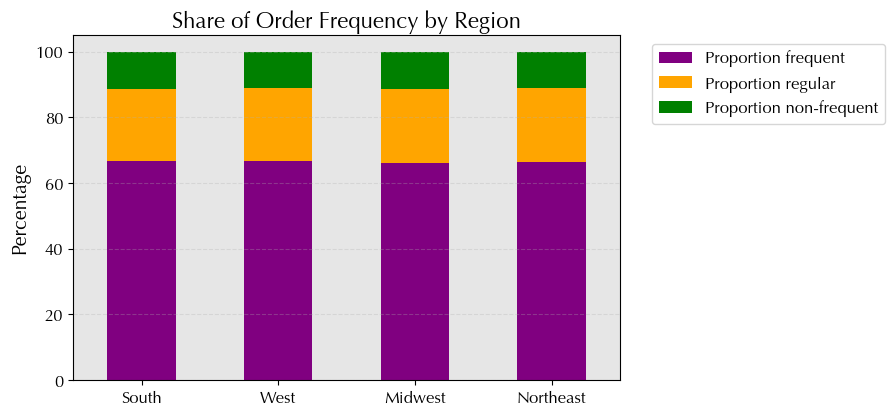

In [235]:
# Plot stacked bars with adjusted parameters
bar_cross_region_freq_relative = cross_region_freq[['Proportion frequent', 'Proportion regular', 'Proportion non-frequent']].plot.bar(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Order Frequency by Region', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Percentage', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.5, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [236]:
# Export bar chart
bar_cross_region_freq_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_bar_cross_region_freq_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Total orders:**

* The South region has the highest total number of orders, followed by the West, Midwest, and Northeast regions.

**Frequency distribution:** 

* Across all regions, the majority of customers are classified as 'Frequent Customers', with the highest percentage in the South region (66.65%) and the lowest in the Midwest region (66.05%).

**Non-frequent customers:** 

* The percentage of infrequent customers is relatively consistent across regions, ranging from 11.01% in the Northeast to 11.36% in the Midwest.

**Regular customers:** 

* The share of regular customers is also consistent across regions, ranging from 21.95% in the West to 22.59% in the Midwest.

**Missing data:** 

* There are some missing values (NaN) in the dataset, particularly in the South region. These missing values may be customers who placed only one order. Since the threshold for orders will be set to >= 5 in a next step, these missing values can be disregarded.

Overall, while there are slight variations in the distribution of order frequency by region, the trends suggest that the majority of customers in all regions are frequent buyers, followed by regular customers and non-frequent customers.

## 5.3 Spending habits

### 5.3.1 Calculating relative spendings

In [164]:
# Create crosstab of 'region' and 'spending_flag'
cross_region_spend = pd.crosstab(df_no_pii['region'], df_no_pii['spending_flag'], dropna = False)

cross_region_spend

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [165]:
# Calculate the total count of high and low spenders
cross_region_spend['Total'] = cross_region_spend['High spender'] + cross_region_spend['Low spender']

# Calculate the proportions of high and low spenders
cross_region_spend['Proportion high'] = cross_region_spend['High spender'] / cross_region_spend['Total'] * 100
cross_region_spend['Proportion low'] = cross_region_spend['Low spender'] / cross_region_spend['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_region_spend = cross_region_spend.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_region_spend

spending_flag,High spender,Low spender,Total,Proportion high,Proportion low
region,,,,,
South,209691,10582194,10791885,1.94,98.06
West,160354,8132559,8292913,1.93,98.07
Midwest,155975,7441350,7597325,2.05,97.95
Northeast,108225,5614511,5722736,1.89,98.11


### 5.3.2 Visualizing spending patterns

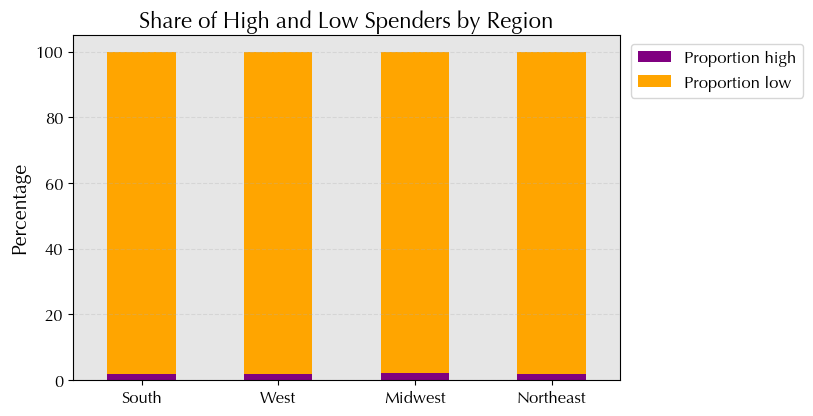

In [237]:
# Plot stacked bars with adjusted parameters
bar_cross_region_spend_relative = cross_region_spend[['Proportion high', 'Proportion low']].plot.bar(stacked=True, color=[color_purple, color_orange])

# Set labels and title
plt.title('Share of High and Low Spenders by Region', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Percentage', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.35, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [238]:
# Export bar chart
bar_cross_region_spend_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_bar_cross_region_spend_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* The total number of customers (both high spenders and low spenders combined) varies between regions, with the South having the highest total number of customers (10,791,885) and the Northeast having the lowest total number of customers (5,722,736).
* Despite differences in the absolute numbers of high spenders between the regions, the differences are relatively small compared to the total number of customers in each region.
* While there are negligible differences in the proportions of high and low spenders by region, the vast majority of customers in all regions are low spenders. 

These observations suggest that while there are differences in the absolute numbers of high spenders between regions, the majority of customers in all regions tend to be low spenders.

**_______________________________________________________________________________________________________________**

# 6. Exclusion flag

In [37]:
%%time
# Create an exclusion flag for low-activity customers
# Use boolean indexing to assign True to rows where 'max_order' < 5 and False otherwise
df_no_pii['exclusion_flag'] = df_no_pii['max_order'] < 5

CPU times: user 9.59 ms, sys: 20 ms, total: 29.6 ms
Wall time: 26.6 ms


In [38]:
# Check frequencies of new column 'exclusion_flag'
df_no_pii['exclusion_flag'].value_counts()

exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [39]:
%%time
# Create new dataframe with high-activity customers only
df_filtered = df_no_pii[df_no_pii['exclusion_flag'] == False]

CPU times: user 4.98 s, sys: 12.8 s, total: 17.8 s
Wall time: 29.3 s


In [40]:
# Check the output
df_filtered.shape

(30964564, 31)

In [41]:
# Print columns of the dataframe
df_filtered.columns

Index(['product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'user_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'family_status', 'income', 'department', 'region', 'exclusion_flag'],
      dtype='object')

In [42]:
# Create dataframe with excluded sample
df_excluded = df_no_pii[df_no_pii['exclusion_flag'] == True]

In [43]:
%%time
# Export df_excluded as "low_activity_excluded.pkl" 
df_excluded.to_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'low_activity_excluded.pkl'))

CPU times: user 805 ms, sys: 281 ms, total: 1.09 s
Wall time: 1.17 s


# 7. Temporal analysis

## 7.1 Busiest hours of the day

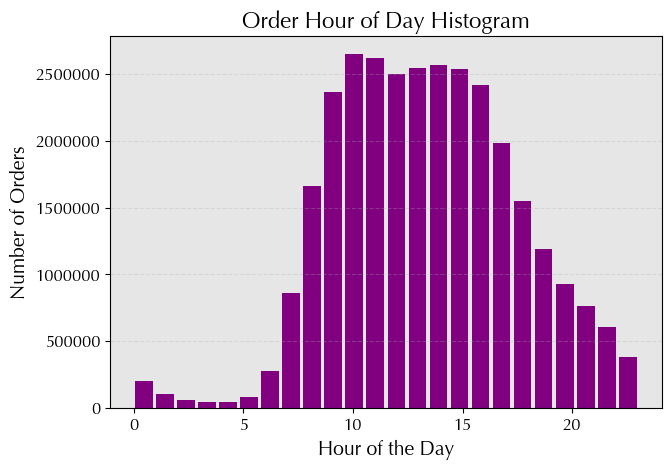

In [233]:
# Plot the histogram
hist_busiest_hours = df_filtered['order_hour_of_day'].plot.hist(bins=24, rwidth=0.85, color=color_purple)

# Set title and labels
plt.title('Order Hour of Day Histogram', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Hour of the Day', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

plt.show()

In [234]:
# Export histogram
hist_busiest_hours.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_hist_busiest_hours.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* The highest order counts are from 10am to 4pm, indicating high activity or demand during these times.
* There are lower order counts during the early morning hours (e.g., 12:00 am - 6:00 am) and late night hours (e.g., 9:00 pm - 11:00 pm), indicating lower activity or fewer orders during those times.

**_______________________________________________________________________________________________________________**

## 7.2 Busiest days of the week

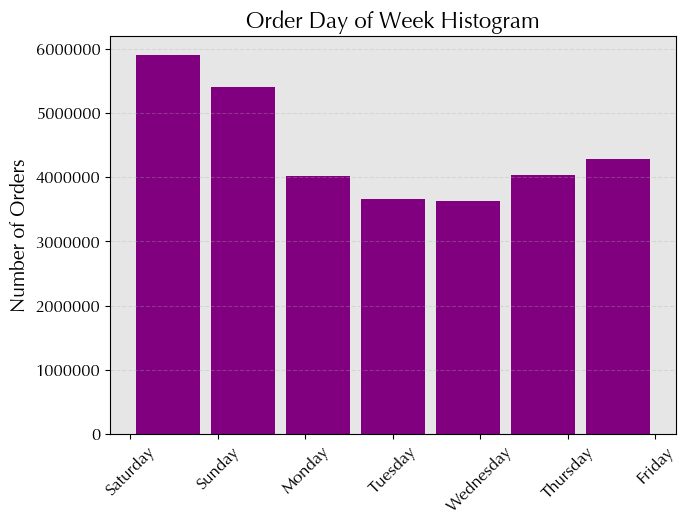

In [231]:
# Define the day names
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Plot the histogram
hist_busiest_days = df_filtered['order_day_of_week'].plot.hist(bins=7, rwidth=0.85, color=color_purple)

# Set title and labels
plt.title('Order Day of Week Histogram', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

# Set custom tick labels
plt.xticks(range(7), day_names, rotation=45)

plt.show()

In [232]:
# Export histogram
hist_busiest_days.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_hist_busiest_days.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* The weekend days, Sunday and Saturday, have the highest order frequencies, indicating that customers tend to shop more on weekends, perhaps because they have more free time.
* There is a noticeable decrease in order frequency during the weekdays, with Friday having the highest order frequency during the week, followed by Thursday, indicating a significant amount of shopping activity towards the end of the week.
* Wednesday has the lowest order frequency of all weekdays, indicating that it may be the least popular day to place orders.

**_______________________________________________________________________________________________________________**

## 7.3 Most money spent

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


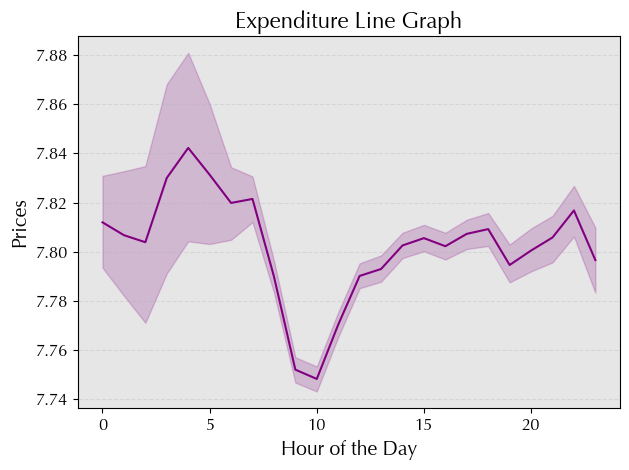

CPU times: user 5min 35s, sys: 29.1 s, total: 6min 4s
Wall time: 9min 14s


In [225]:
%%time
# Plot the line graph
line_expenditure = sns.lineplot(data=df_filtered, x='order_hour_of_day', y='prices', color=color_purple)

# Set title and labels
plt.title('Expenditure Line Graph', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Hour of the Day', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('Prices', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

plt.show()

In [226]:
# Export line graph
line_expenditure.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_line_expenditure.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Rising prices from 1 a.m. to 5 a.m.:** \
This trend could be influenced by several factors, such as increased demand for certain products or services during the early morning hours, limited availability of goods during these hours, or the convenience premium associated with early morning purchases. In addition, suppliers may adjust prices based on real-time data and demand patterns to maximize profitability.

**Decreasing prices after 5 a.m. with a low point around 10 a.m.:** \
The drop in prices after 5 a.m., with a low point around 10 a.m., could be attributed to several factors. One possible explanation is that the initial surge in demand during the early morning hours tapers off as the day progresses, leading sellers to adjust prices downward to stimulate further sales. In addition, more products may become available as the day progresses, leading to increased competition and lower prices.

**Price difference between morning and evening hours:** \
The observed price difference between morning and evening hours could be driven by shifts in consumer behavior and market dynamics throughout the day. For example, consumers may be more willing to pay higher prices for convenience or urgent purchases in the early morning, while price sensitivity may decrease in the evening hours when there are more options and less urgency to make purchases.

**Overall pricing trend:** \
The overall pricing trend of increasing prices in the early morning, peaking before breakfast, dropping significantly before 10 a.m., and gradually increasing again in the afternoon and evening may reflect a combination of supply and demand dynamics, consumer preferences, and operational considerations. Suppliers may dynamically adjust prices to optimize revenue and adapt to changing market conditions throughout the day.

**_______________________________________________________________________________________________________________**

# 8. Loyalty status

## 8.1 Order frequency

In [123]:
# Check frequencies of the loyalty flag
df_filtered['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

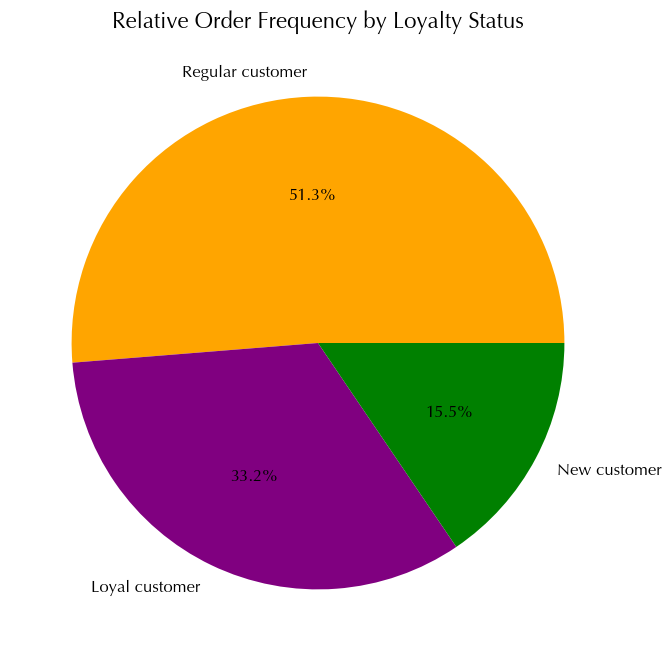

In [121]:
# Calculate the percentage values for each category
loyalty_percentage = df_filtered['loyalty_flag'].value_counts(normalize=True) * 100

# Plot the pie chart
pie_loyalty_relative = loyalty_percentage.plot(kind='pie', figsize=figsize, colors=[color_orange, color_purple, color_green], autopct='%1.1f%%')

# Set title and labels
plt.title('Relative Order Frequency by Loyalty Status', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label

# Set font size for percentage values inside the pie chart
for text in pie_loyalty_relative.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()

In [122]:
# Export pie chart
pie_loyalty_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_pie_loyalty_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* Regular customers are the most common group with almost 16,000,000 (>50%). These customers have placed between 10 and 40 orders in total, indicating that they are frequent buyers, but not necessarily as loyal as the 'Loyal customers' group.
* Loyal customers are the second most common group with a number of > 10,000,000 (~30%). These customers have placed more than 40 orders in total, indicating a high level of brand loyalty. They are likely to be repeat customers who use the service or purchase products regularly.
* New customers are the least common group with ~ 6,000,000 (~15%). These customers have placed less than or equal to 10 orders in total. They are new to the service or product and may not have established loyalty.

**_______________________________________________________________________________________________________________**

## 8.2 Ordering habits

### 8.2.1 Calculating relative order frequency

In [192]:
# Create crosstab of 'loyalty_flag' and 'frequency_flag'
cross_loyalty_freq = pd.crosstab(df_filtered['loyalty_flag'], df_filtered['frequency_flag'])

cross_loyalty_freq.to_clipboard()

In [240]:
# Calculate the total count of usage frequencies
cross_loyalty_freq['Total'] = cross_loyalty_freq['Frequent customer'] + cross_loyalty_freq['Non-frequent customer'] + cross_loyalty_freq['Regular customer']

# Calculate the proportions of customer frequencies
cross_loyalty_freq['Proportion frequent'] = cross_loyalty_freq['Frequent customer'] / cross_loyalty_freq['Total'] * 100
cross_loyalty_freq['Proportion non-frequent'] = cross_loyalty_freq['Non-frequent customer'] / cross_loyalty_freq['Total'] * 100
cross_loyalty_freq['Proportion regular'] = cross_loyalty_freq['Regular customer'] / cross_loyalty_freq['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_loyalty_freq = cross_loyalty_freq.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_loyalty_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer,Total,Proportion frequent,Proportion non-frequent,Proportion regular
loyalty_flag,,,,,,,
Regular customer,9631222,911475,5334079,15876776,60.66,5.74,33.60
Loyal customer,10279960,0,4133,10284093,99.96,0.00,0.04
New customer,1293294,1983500,1526901,4803695,26.92,41.29,31.79


### 8.2.2 Visualizing order frequency

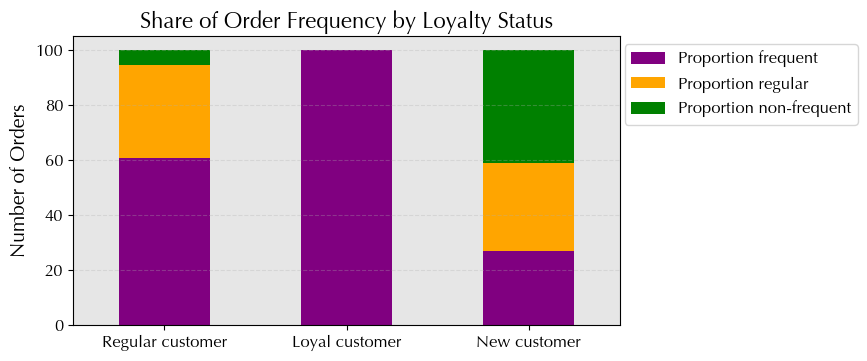

In [241]:
# Plot stacked bars with adjusted parameters
bar_cross_loyalty_freq_relative = cross_loyalty_freq[['Proportion frequent', 'Proportion regular', 'Proportion non-frequent']].plot.bar(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Order Frequency by Loyalty Status', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.45, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [242]:
# Export bar chart
bar_cross_loyalty_freq_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_bar_cross_loyalty_freq_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Regular customers:**

* They represent the majority of customers with 15,876,776 orders. The majority of orders (60.66%) come from regular customers, indicating a significant proportion of loyal and new customers.

**Loyal customers:** 

* Despite being a smaller group in terms of total customers, loyal customers have a high order frequency. Nearly all (99.96%) of their orders fall into the frequent customer category, reflecting strong brand loyalty and consistent purchasing behavior.

**New customers:**

* This group has the lowest order frequency of the three categories. While they make up a significant portion of the total customer base, their orders are primarily in the non-frequent category (41.29%), indicating a lower level of engagement compared to regular and loyal customers.

Overall, regular customers drive the highest order frequency, while loyal customers demonstrate the highest level of loyalty and new customers show potential for future engagement. Targeted marketing efforts should focus on retaining core customers, nurturing new customer loyalty, and capitalizing on the high engagement of loyal customers.

**_______________________________________________________________________________________________________________**

## 8.3 Spending habits

### 8.3.1 Calculating relative spendings

In [193]:
# Create crosstab of 'loyalty_flag' and 'spending_flag'
cross_loyalty_spend = pd.crosstab(df_filtered['loyalty_flag'], df_filtered['spending_flag'])

cross_loyalty_spend.to_clipboard()

In [244]:
# Calculate the total count of high and low spenders
cross_loyalty_spend['Total'] = cross_loyalty_spend['High spender'] + cross_loyalty_spend['Low spender']

# Calculate the proportions of high and low spenders
cross_loyalty_spend['Proportion high'] = cross_loyalty_spend['High spender'] / cross_loyalty_spend['Total'] * 100
cross_loyalty_spend['Proportion low'] = cross_loyalty_spend['Low spender'] / cross_loyalty_spend['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_loyalty_spend = cross_loyalty_spend.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_loyalty_spend

spending_flag,High spender,Low spender,Total,Proportion high,Proportion low
loyalty_flag,,,,,
Regular customer,302814,15573962,15876776,1.91,98.09
Loyal customer,216600,10067493,10284093,2.11,97.89
New customer,84011,4719684,4803695,1.75,98.25


### 8.3.2 Visualizing spending patterns

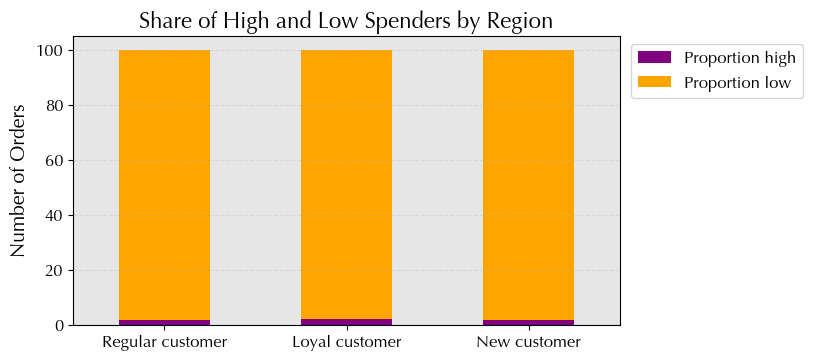

In [245]:
# Plot stacked bars with adjusted parameters
bar_cross_loyalty_spend_relative = cross_loyalty_spend[['Proportion high', 'Proportion low']].plot.bar(stacked=True, color=[color_purple, color_orange])

# Set labels and title
plt.title('Share of High and Low Spenders by Region', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.35, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [246]:
# Export bar chart
bar_cross_loyalty_spend_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_bar_cross_loyalty_spend_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**High spenders:**

* Regular customers have the highest number of high spenders with 302,814, followed by loyal customers with 216,600. New customers have the lowest number of high spenders at 84,011. However, when looking at high spenders as a percentage of total customers within each loyalty group, loyal customers have the highest percentage of high spenders (2.11%), followed by regular customers (1.91%) and new customers (1.75%).

**Low spenders:**

* Regular customers also have the highest number of low spenders at 15,573,962, followed by loyal customers at 10,067,493. New customers have the lowest number of low spenders at 4,719,684. Within each loyalty group, the percentage of low spenders is highest among new customers (98.25%), followed by regular customers (98.09%) and loyal customers (97.89%).

Overall, regular customers are the largest customer segment in terms of both high and low spenders. Loyal customers have a higher proportion of high spenders than other loyalty groups, indicating greater purchasing power and potentially higher loyalty. New customers have a higher proportion of low spenders, which may be due to their unfamiliarity with the platform or cautious spending patterns as they explore available products and services.

**_______________________________________________________________________________________________________________**

# 9. Popular products

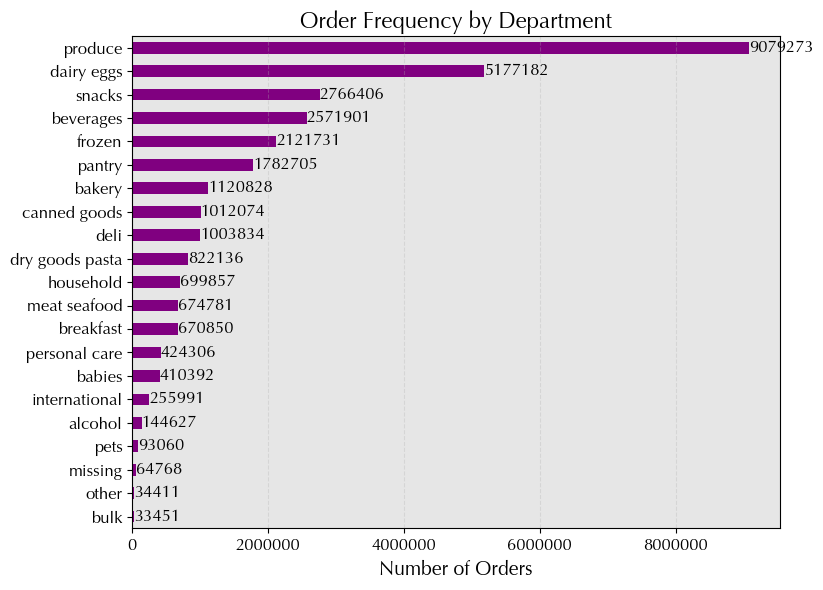

In [44]:
# Set plot size
plt.figure(figsize=(8, 6))

# Plot the horizontal bar chart
barh_departments = df_filtered['department'].value_counts(ascending=True).plot(kind='barh', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Department', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Add values to the bars
for index, value in enumerate(df_filtered['department'].value_counts(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontname=fontname, fontsize=fontsize_tick)

plt.show()

In [45]:
# Export bar chart
barh_departments.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_barh_departments.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* 'Produce' and 'Dairy Eggs' are the most popular departments, with significantly higher order frequencies than others.
* Perishable departments such as 'Produce', 'Dairy Eggs' and 'Frozen' are among the top departments, indicating a high demand for fresh and refrigerated products.
* 'Snacks', 'Beverages' and 'Pantry' also have high order frequencies, indicating a demand for convenience and everyday essentials.
* Departments such as 'Personal Care', 'Baby' and 'Household' have relatively low order frequencies compared to food-related departments, but still show significant demand.
* 'Missing', 'Other' and 'Bulk' have the lowest order frequencies, indicating less popular or specialized categories.

**_______________________________________________________________________________________________________________**

# 10. Prices

## 10.1 Price frequencies

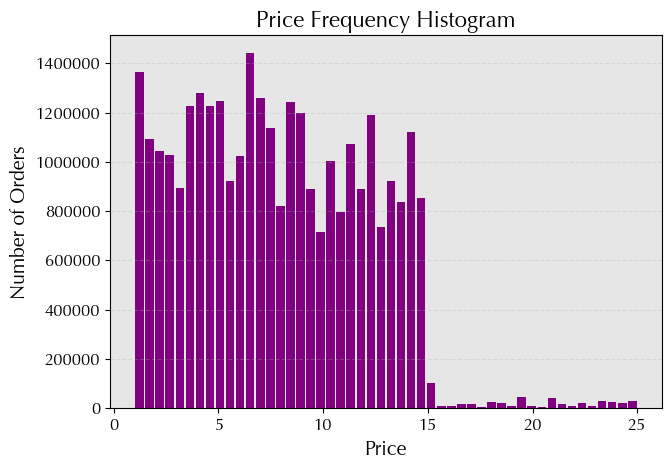

In [131]:
# Plot the histogram
hist_prices = df_filtered['prices'].plot.hist(bins=50, rwidth=0.85, color=color_purple)

# Set title and labels
plt.title('Price Frequency Histogram', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Price', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

plt.show()

In [132]:
# Export histogram
hist_prices.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_hist_prices.png'), bbox_inches='tight')

In [133]:
# Suppress scientific notation by specifying the display format for floating-point numbers
pd.options.display.float_format = '{:,.2f}'.format

df_filtered['prices'].describe()

count   30,959,687.00
mean             7.79
std              4.07
min              1.00
25%              4.20
50%              7.40
75%             11.30
max             25.00
Name: prices, dtype: float64

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Price distribution:**
* The prices of products at Instacart vary widely, as indicated by the relatively large standard deviation of \$4.07. This suggests that there is a wide variety of products with different price tags available on the platform.

**Central tendency:** 
* The mean price of \\$7.79 and the median price of \\$7.40 are close together, indicating that the distribution of prices is approximately symmetric or only slightly skewed.

**Price Range:** 
* The price range extends from a low of \\$1.00 to a high of \\$25.00, reflecting the diversity in the cost of products offered by Instacart.

**Percentiles:** 
* The interquartile range (IQR), which represents the middle 50\% of the data, ranges from the 25th percentile (Q1) of \\$4.20 to the 75th percentile (Q3) of \\$11.30. This range provides insight into the typical price range for most products available on Instacart.

Based on these descriptive statistics, marketing and sales teams might consider using simpler price range groupings such as 'Low Price,' 'Medium Price,' and 'High Price' to categorize products and effectively target their efforts. These groupings can be defined based on the quartiles (Q1, Q2, Q3) or other meaningful divisions in the price distribution.

**_______________________________________________________________________________________________________________**

## 10.2 Price ranges

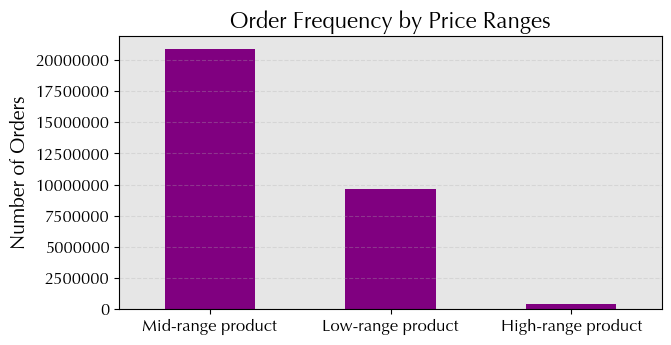

In [134]:
# Plot the horizontal bar chart
bar_price_ranges = df_filtered['price_range'].value_counts(ascending=False).plot(kind='bar', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Price Ranges', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('') # Remove the x-axis label
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate tick labels on x-axis for better readability
plt.xticks(rotation=0)

plt.show()

In [135]:
# Export bar chart
bar_price_ranges.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_bar_price_ranges.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Mid-range products:**

* The majority of products fall into the mid-range category, with approximately 20,891,771 products falling into this price range. This indicates that the mid-range price category is the most common among the products offered by Instacart.

**Low-range products:**

* There are a significant number of products categorized as low priced, with approximately 9,674,840 products falling into this category. While not as prevalent as mid-range products, low-range products still make up a significant portion of Instacart's product offering.

**High-range products:**

* High-priced products are the smallest category, with only about 397,953 products falling into this price range. This suggests that high-priced items are less common on Instacart than mid- and low-priced items.

Overall, the distribution suggests that Instacart's product offering is skewed toward mid- and low-priced products, with fewer high-priced items available on the platform.

**_______________________________________________________________________________________________________________**

# 11. Customer profiling

## 11.1 family_status

### 11.1.1 Creating variable 'age_range'

In [47]:
%%time
# Create 'age_range'
df_filtered.loc[df_filtered['age'] <30, 'age_range'] = 'Young Adult'
df_filtered.loc[(df_filtered['age'] >=30) & (df_filtered['age'] <60), 'age_range'] = 'Adult'
df_filtered.loc[df_filtered['age'] >=60, 'age_range'] = 'Senior'

CPU times: user 614 ms, sys: 70.7 ms, total: 684 ms
Wall time: 695 ms


In [48]:
# Check frequencies of new column 'age_range'
df_filtered['age_range'].value_counts(dropna=False)

age_range
Adult          14572457
Senior         10574504
Young Adult     5817603
Name: count, dtype: int64

### 11.1.2 'family_status vs. age'

In [49]:
# Create crosstab of 'age_range' and 'family_status'
cross_age_family = pd.crosstab(df_filtered['family_status'], df_filtered['age_range'], dropna=False)

cross_age_family

age_range,Adult,Senior,Young Adult
family_status,,,
divorced/widowed,0,2645271,0
living with parents and siblings,0,0,1481172
married,10925665,7929233,2888813
single,3646792,0,1447618


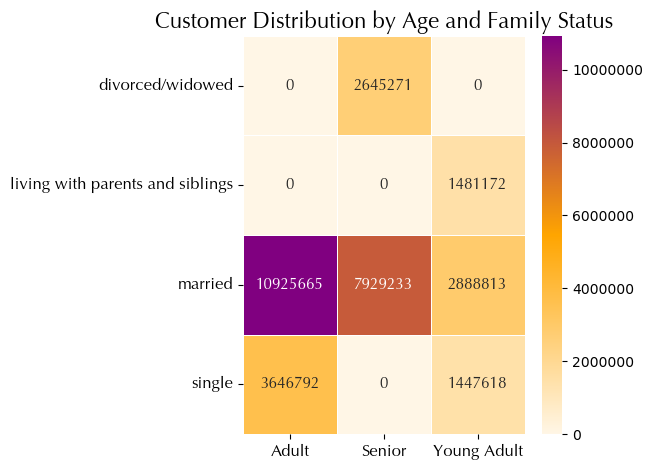

In [50]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_age_family = sns.heatmap(cross_age_family, cmap=custom_cmap, annot=True, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Customer Distribution by Age and Family Status', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_age_family.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [51]:
# Export heatmap
heat_age_family.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_heat_age_family.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Divorced/widowed individuals:** 

* Only seniors in the 'divorced/widowed' category have placed orders. No orders were attributed to adults or young adults in this family status group. This may indicate that older people who are divorced or widowed are more likely to order than younger people with similar family status.

**Living with parents and siblings:** 

* Only young adults in the 'living with parents and siblings' category have placed orders. No orders were attributed to adults or seniors in this family status group. This suggests that young adults living with their parents or siblings are more likely to rely on ordering habits, possibly due to shared living arrangements or financial support from family members.

**Married individuals:**

* Orders were placed by adults, seniors, and young adults in the 'married' category. However, the highest frequency of ordering is observed among adults, followed by seniors and young adults. This suggests that married adults are the most active in their ordering habits, possibly due to household responsibilities and shared financial management.

**Single individuals:** 

* Orders are placed by adults and young adults in the 'single' category, but no orders are attributed to seniors. Among single individuals, adults have a higher order frequency compared to young adults. This suggests that single adults are more engaged in their ordering habits than their younger counterparts.

In summary, the data from the crosstab shows that there is a relationship between age and family status in terms of ordering habits. The frequency of ordering varies between different age groups within each family status group, highlighting the influence of both age and family dynamics on ordering behaviors.

**_______________________________________________________________________________________________________________**

### 11.1.3 'family_status vs. dependants'

In [52]:
# Create crosstab of 'dependants' and 'family_status'
cross_dependants_family = pd.crosstab(df_filtered['family_status'], df_filtered['dependants'], dropna=False)

cross_dependants_family

dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


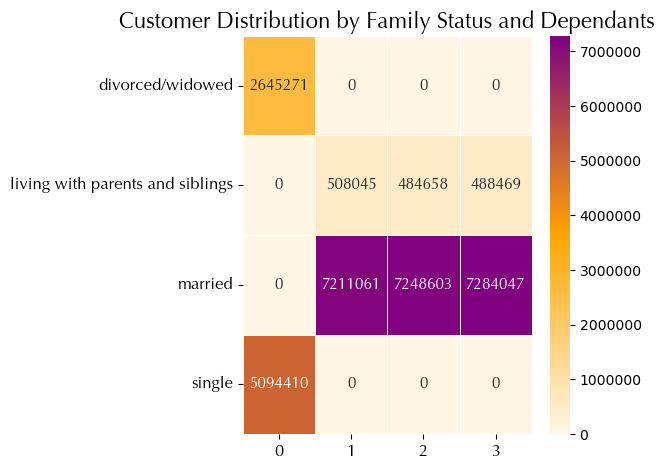

In [53]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_dependants_family = sns.heatmap(cross_dependants_family, cmap=custom_cmap, annot=True, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Customer Distribution by Family Status and Dependants', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_dependants_family.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [54]:
# Export bar chart
heat_dependants_family.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_heat_dependants_family.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Heatmap 'family_status vs. age':**

* Most adults and young adults are married.
* Senior individuals are mostly either divorced/widowed or married.
* There are no adults or seniors living with parents and siblings.
* The "single" category has a significant number of adults and young adults.

**Heatmap 'family_status vs. dependants':**

* Most individuals living with parents and siblings have 1 or more dependants.
* Married individuals have 1 or more dependants with a relatively equal distribution across 1, 2, and 3 dependants.
* Individuals who are divorced/widowed or single have no dependants.

Overall, the data suggests a connection between family status, age range, and the number of dependants. Married individuals tend to have more dependants compared to others, while divorced/widowed or single individuals typically have none. Additionally, the majority of individuals living with parents and siblings have 1 or 2 dependants.

**_______________________________________________________________________________________________________________**

## 11.2 demographic_profile

### 11.2.1 Defining profile

In [55]:
%%time
# Aggregate data for each user ID
user_data_agg = df_filtered.groupby('user_id').agg({
    'age': 'first',
    'dependants': 'first',
    'family_status': 'first'
}).reset_index()

# Define function for family profile assignment
def get_demographic_profile(dependants, age, family_status):
    if dependants == 0:
        if age < 30:
            return 'YoungCouple' if family_status == 'married' else 'YoungSingle'
        elif 30 <= age < 60:
            return 'AdultCouple' if family_status == 'married' else 'ChildlessAdult'
        elif age >= 60:
            return 'SeniorCouple' if family_status == 'married' else 'ChildlessSenior'
    else:
        if age < 30:
            return 'YoungFamily' if family_status == 'married' else 'YoungParent'
        elif 30 <= age < 60:
            return 'AverageFamily' if family_status == 'married' else 'SingleParent'
        elif age >= 60:
            return 'SeniorFamily' if family_status == 'married' else 'SingleSenior'

# Apply family profile assignment function
user_data_agg['demographic_profile'] = user_data_agg.apply(lambda row: get_demographic_profile(row['dependants'], row['age'], row['family_status']), axis=1)        

# Merge the profiles back to the original data
df_filtered = df_filtered.merge(user_data_agg[['user_id', 'demographic_profile']], on='user_id', how='left')

CPU times: user 25.4 s, sys: 1min 23s, total: 1min 48s
Wall time: 2min 31s


In [59]:
# Check frequencies of new column 'demographic_profile'
df_filtered['demographic_profile'].value_counts(dropna=False)

demographic_profile
AverageFamily      10925665
SeniorFamily        7929233
ChildlessAdult      3646792
YoungFamily         2888813
ChildlessSenior     2645271
YoungParent         1481172
YoungSingle         1447618
Name: count, dtype: int64

### 11.2.2 Visualizing profile distribution

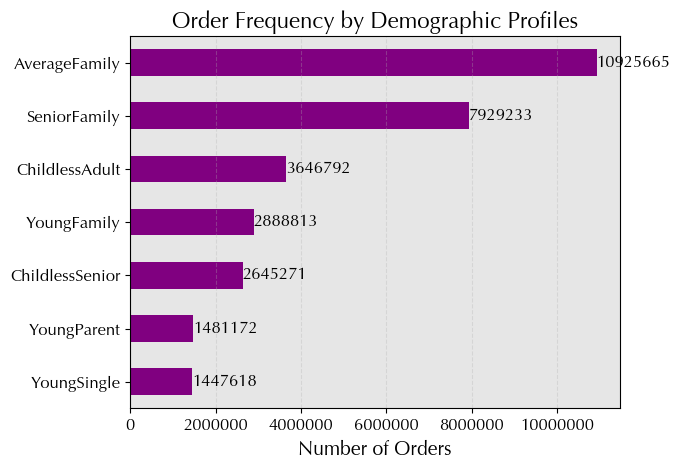

In [60]:
# Plot the horizontal bar chart
barh_demographic_profile = df_filtered['demographic_profile'].value_counts(ascending=True).plot(kind='barh', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Demographic Profiles', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Add values to the bars
for index, value in enumerate(df_filtered['demographic_profile'].value_counts(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontname=fontname, fontsize=fontsize_tick)

plt.show()

In [61]:
# Export bar chart
barh_demographic_profile.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_barh_demographic_profile.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Single and parent profiles:**

* Profiles with dependants (AverageFamily, SeniorFamily) have a higher overall frequency than profiles without dependants, indicating that the majority of customers in the dataset have children.

**Diversity of family profiles:**

* Among profiles with dependants, those representing families (i.e. with family_status == 'married') appear to be more common, suggesting that married couples with dependants are a significant part of the customer base. 
* Profiles with no dependants (ChildlessAdult, ChildlessSenior) are less common overall, but still represent a significant portion of the dataset, indicating that individuals or couples with no dependants are also present in the customer base, albeit to a lesser extent than families.

Comparing the above bar chart with the heatmaps of age ranges, family status, and dependants, it is striking that the figures relating age and family status are identical to those that include the number of dependants. This suggests a strong relationship between the three variables.

**_______________________________________________________________________________________________________________**

### 11.2.3 Usage frequency

#### Descriptive statistics

In [62]:
# Print descriptive statistics
demographic_usage_freq = df_filtered.groupby('demographic_profile')['days_since_prior_order'].agg(['min', 'mean', 'max'])

demographic_usage_freq

,min,mean,max
demographic_profile,,,
AverageFamily,0.0,10.829787,30.0
ChildlessAdult,0.0,10.771922,30.0
ChildlessSenior,0.0,10.750328,30.0
SeniorFamily,0.0,10.817469,30.0
YoungFamily,0.0,10.796515,30.0
YoungParent,0.0,10.750995,30.0
YoungSingle,0.0,10.918571,30.0


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* The minimum value for days since the prior order is 0 for all demographic profiles, reflecting the first purchase of each customer.

**Mean:** 

* The mean days since the prior order ranges from approximately 10.75 to 10.92 across different demographic profiles. This suggests that, on average, customers across different demographic profiles tend to wait a similar amount of time between orders.

**Maximum (max):**

* The maximum value for days since the prior order is consistently 30 for all demographic profiles. This indicates that some customers place orders exactly 30 days apart from their previous purchases, possibly indicating a monthly purchasing pattern.

Overall, there is consistency in the distribution of days since the prior order across different demographic profiles, with similar mean values and a maximum value of 30 days across the board.

**_______________________________________________________________________________________________________________**

#### Visualizing frequency_flag

In [194]:
# Create crosstab of 'demographic_profile' and 'frequency_flag'
cross_demographic_freq = pd.crosstab(df_filtered['demographic_profile'], df_filtered['frequency_flag'], dropna=False)

cross_demographic_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
demographic_profile,,,
AverageFamily,7469329,1029691,2426645
ChildlessAdult,2489179,334951,822662
ChildlessSenior,1819123,243934,582214
SeniorFamily,5433095,746604,1749534
YoungFamily,1986401,263528,638884
YoungParent,1030514,138646,312012
YoungSingle,976835,137621,333162


In [195]:
# Calculate the total count of usage frequencies
cross_demographic_freq['Total'] = cross_demographic_freq['Frequent customer'] + cross_demographic_freq['Non-frequent customer'] + cross_demographic_freq['Regular customer']

# Calculate the proportions of customer frequencies
cross_demographic_freq['Proportion frequent'] = cross_demographic_freq['Frequent customer'] / cross_demographic_freq['Total'] * 100
cross_demographic_freq['Proportion non-frequent'] = cross_demographic_freq['Non-frequent customer'] / cross_demographic_freq['Total'] * 100
cross_demographic_freq['Proportion regular'] = cross_demographic_freq['Regular customer'] / cross_demographic_freq['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_demographic_freq = cross_demographic_freq.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_demographic_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer,Total,Proportion frequent,Proportion non-frequent,Proportion regular
demographic_profile,,,,,,,
AverageFamily,7469329,1029691,2426645,10925665,68.36,9.42,22.21
SeniorFamily,5433095,746604,1749534,7929233,68.52,9.42,22.06
ChildlessAdult,2489179,334951,822662,3646792,68.26,9.18,22.56
YoungFamily,1986401,263528,638884,2888813,68.76,9.12,22.12
ChildlessSenior,1819123,243934,582214,2645271,68.77,9.22,22.01
YoungParent,1030514,138646,312012,1481172,69.57,9.36,21.07
YoungSingle,976835,137621,333162,1447618,67.48,9.51,23.01


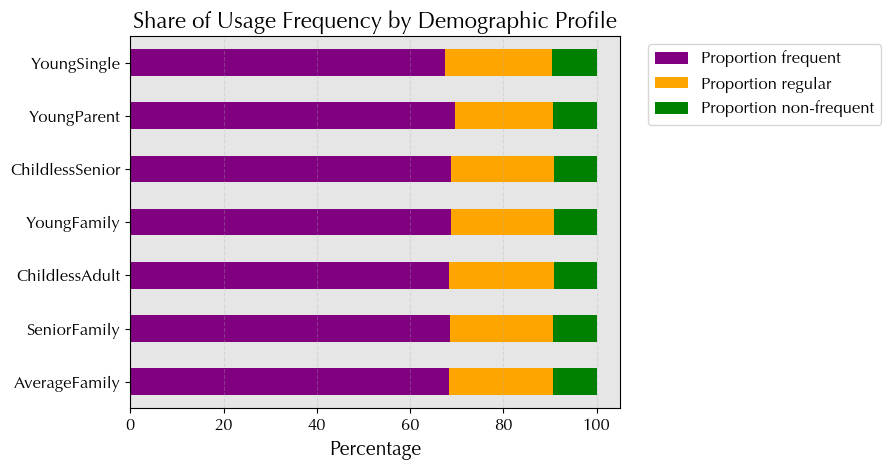

In [196]:
# Plot stacked bars with adjusted parameters
barh_demographic_freq_relative = cross_demographic_frequency[['Proportion frequent', 'Proportion regular', 'Proportion non-frequent']].plot.barh(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Usage Frequency by Demographic Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Percentage', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('') # Remove y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.55, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [197]:
# Export bar chart
barh_demographic_freq_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_barh_demographic_freq_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Consistent usage patterns:**

* Across all demographic profiles, the percentage of frequent customers is significantly higher than the percentage of infrequent and regular customers. This indicates that a significant portion of customers within each demographic profile tend to shop frequently.

**Proportion of frequent customers:**

* The proportions of frequent customers are relatively consistent across demographic profiles, ranging from 67.48% to 69.57%. This suggests that a substantial majority of customers within each profile exhibit frequent shopping behavior, regardless of their demographic characteristics.

**Proportions of infrequent and regular customers:**

* While the proportions of infrequent and regular customers vary slightly across demographic profiles, they remain relatively low compared to frequent customers. Non-frequent and regular customers represent around 9-10% and 21-23%, respectively, of the total customer base within each profile.

**Frequency of use distribution:**

* The chart provides insight into the distribution of usage frequency across different demographic profiles. Profiles such as 'AverageFamily' and 'SeniorFamily' have higher proportions of frequent users, while profiles such as 'YoungParent' and 'YoungSingle' have slightly lower, but still significant, proportions.

Overall, the analysis highlights the prevalence of frequent customers across different demographic profiles, with relatively consistent proportions of frequent customers observed within each profile.

**_______________________________________________________________________________________________________________**

### 11.2.4 Expenditure

#### Descriptive statistics

In [211]:
# Print descriptive statistics
demographic_prices = df_filtered.groupby('demographic_profile')['prices'].agg(['min', 'mean', 'max'])

demographic_prices

,min,mean,max
demographic_profile,,,
AverageFamily,1.00,7.79,25.00
ChildlessAdult,1.00,7.79,25.00
ChildlessSenior,1.00,7.80,25.00
SeniorFamily,1.00,7.79,25.00
YoungFamily,1.00,7.78,25.00
YoungParent,1.00,7.80,25.00
YoungSingle,1.00,7.77,25.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* The lowest price across all demographic profiles is \$1.00, indicating that products are available at a low price point for all customer segments.
* The average prices for each demographic profile are relatively similar, ranging from \\$7.77 to \\$7.80. This suggests that, on average, customers in different demographic profiles tend to purchase products at similar price points.
* The maximum price is consistent across all demographic profiles at \$25.00, indicating that high-priced products are available to all customer segments.

Overall, there is consistency in the price distribution across demographic profiles, with no significant variation in the average or maximum prices.

**_______________________________________________________________________________________________________________**

#### Visualizing spending_flag

In [198]:
# Create crosstab of 'demographic_profile' and 'spending_flag'
cross_demographic_spend = pd.crosstab(df_filtered['demographic_profile'], df_filtered['spending_flag'], dropna=False)

cross_demographic_spend

spending_flag,High spender,Low spender
demographic_profile,,
AverageFamily,214987,10710678
ChildlessAdult,72369,3574423
ChildlessSenior,50321,2594950
SeniorFamily,156847,7772386
YoungFamily,57623,2831190
YoungParent,27926,1453246
YoungSingle,23352,1424266


In [199]:
# Calculate the total count of high and low spenders
cross_demographic_spend['Total'] = cross_demographic_spend['High spender'] + cross_demographic_spend['Low spender']

# Calculate the proportions of high and low spenders
cross_demographic_spend['Proportion high'] = cross_demographic_spend['High spender'] / cross_demographic_spend['Total'] * 100
cross_demographic_spend['Proportion low'] = cross_demographic_spend['Low spender'] / cross_demographic_spend['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_demographic_spend = cross_demographic_spend.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_demographic_spend

spending_flag,High spender,Low spender,Total,Proportion high,Proportion low
demographic_profile,,,,,
AverageFamily,214987,10710678,10925665,1.97,98.03
SeniorFamily,156847,7772386,7929233,1.98,98.02
ChildlessAdult,72369,3574423,3646792,1.98,98.02
YoungFamily,57623,2831190,2888813,1.99,98.01
ChildlessSenior,50321,2594950,2645271,1.90,98.10
YoungParent,27926,1453246,1481172,1.89,98.11
YoungSingle,23352,1424266,1447618,1.61,98.39


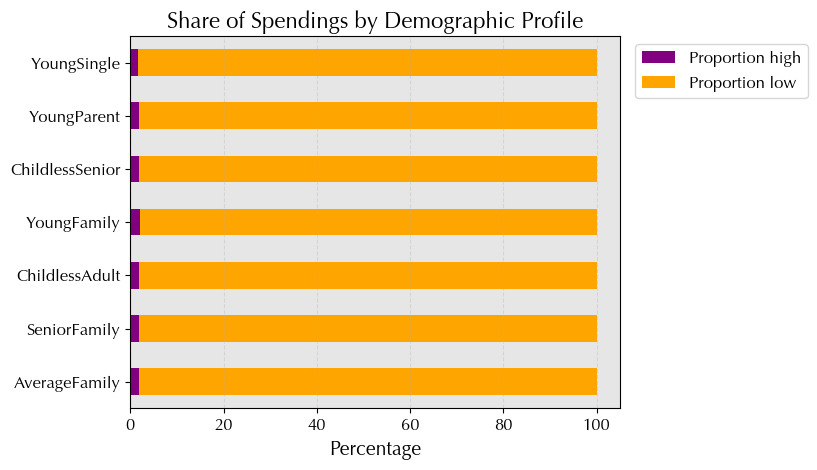

In [200]:
# Plot stacked bars with adjusted parameters
barh_demographic_spend_relative = cross_demographic_spend[['Proportion high', 'Proportion low']].plot.barh(stacked=True, color=[color_purple, color_orange])

# Set labels and title
plt.title('Share of Spendings by Demographic Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Percentage', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('') # Remove y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.4, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [201]:
# Export bar chart
barh_demographic_spend_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_barh_demographic_spend_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Consistent proportions:**

* Across all demographic profiles, the percentage of low spenders is significantly higher than the percentage of high spenders. This indicates that the majority of customers within each demographic profile tend to spend less rather than more on their grocery purchases.

**Proportions of high spenders:**

* The percentage of high spenders varies slightly among the different demographic profiles, but generally remains low, ranging from 1.61% to 1.99%. This suggests that a small proportion of customers within each demographic profile are responsible for a larger share of total spend.

**Proportions of low spenders:**

* Conversely, the percentage of low spenders is consistently high across all demographic profiles, ranging from 98.01% to 98.39%. This indicates that the majority of customerspers within each demographic profile tend to spend relatively modest amounts on their grocery purchases.

**Relative spending:**

* The chart provides insight into the relative spending levels of different demographic profiles. Profiles such as 'AverageFamily' and 'SeniorFamily' have higher total expenditures compared to profiles such as 'YoungSingle' and YoungParent, which is consistent with expectations based on family size and life stage.

Overall, the analysis highlights the distribution of spending levels across different demographic profiles and underscores the predominance of low spenders within each profile.

### 11.2.5 Comparison across regions

In [72]:
# Create crosstab of 'demographic_profile' and 'region'
cross_demographic_region = pd.crosstab(df_filtered['demographic_profile'], df_filtered['region'], dropna=False)

cross_demographic_region

region,Midwest,Northeast,South,West
demographic_profile,,,,
AverageFamily,2574356,1945258,3618787,2787264
ChildlessAdult,875876,611214,1210280,949422
ChildlessSenior,617198,478767,877314,671992
SeniorFamily,1838245,1405462,2644107,2041419
YoungFamily,674661,503053,960855,750244
YoungParent,351435,256430,505457,367850
YoungSingle,329742,264501,494339,359036


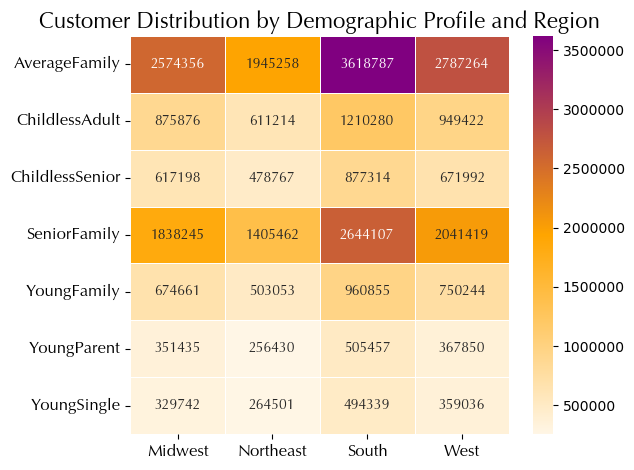

In [73]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_demographic_region = sns.heatmap(cross_demographic_region, cmap=custom_cmap, annot=True, annot_kws={'size': 10, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Customer Distribution by Demographic Profile and Region', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_demographic_region.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [74]:
# Export heatmap
heat_demographic_region.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_heat_demographic_region.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Family profiles (AverageFamily, SeniorFamily, YoungFamily):**

* These profiles show a similar pattern across regions, with the South region having the highest representation, followed by the Midwest and West regions. The Northeast region generally has the lowest frequency of customers in these family profiles.

**Single profiles (ChildlessAdult, ChildlessSenior, YoungSingle):**

* Customers in these profiles show a consistent distribution across regions, with slightly higher representation in the South and Midwest regions compared to the Northeast and West regions. The Northeast region tends to have the lowest frequency of customers in these single profiles.

**Parent profiles (YoungParent):**

* The distribution of customers in the YoungParent profile mirrors that of the family profiles, with the South region having the highest representation, followed by the Midwest and West regions. The Northeast region has the fewest customers in this profile.

Overall, there's a noticeable trend where the South region tends to have higher frequencies of customers in various demographic profiles, while the Northeast region typically has lower frequencies in most profiles.

**_______________________________________________________________________________________________________________**

### 11.2.6 Comparison across departments

#### Determining the Top 5 departments

In [75]:
# Group by demographic_profile and department, then get the value_counts
demographic_department_counts = df_filtered.groupby(['demographic_profile', 'department']).size()

# Unstack the dataframe to make demographic_profile the columns
demographic_department_counts = demographic_department_counts.unstack(level=0)

# Select only the top 5 departments for each demographic profile
demographic_top5 = demographic_department_counts.apply(lambda x: x.nlargest(5), axis=0)

demographic_top5

demographic_profile,AverageFamily,ChildlessAdult,ChildlessSenior,SeniorFamily,YoungFamily,YoungParent,YoungSingle
department,,,,,,,
produce,3202494,1073230,777094,2327024,843775,430539,425117
dairy eggs,1827670,610722,442602,1319910,485019,250207,241052
snacks,979531,324228,236244,704489,260638,131310,129966
beverages,906611,303966,220879,662790,238052,119107,120496
frozen,745828,248723,183957,545006,198556,102993,96668


#### Visualizing the Top 5 departments

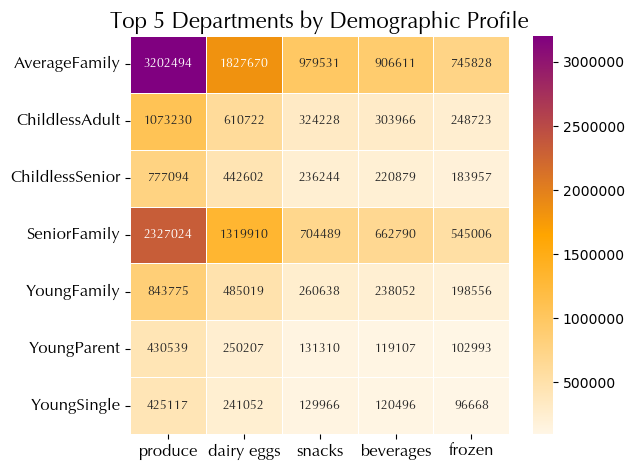

In [76]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_demographic_top5 = sns.heatmap(demographic_top5.T, cmap=custom_cmap, annot=True, annot_kws={'size': 9, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Top 5 Departments by Demographic Profile', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_demographic_top5.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [77]:
# Export heatmap
heat_demographic_top5.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_heat_demographic_top5.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

The heatmap shows quite similar ordering habits across different demographic profiles:

**'Produce':**

* This is consistently the most popular department across all demographic profiles, indicating a universal preference for fresh fruits and vegetables.

**'Dairy eggs' and 'Snacks':**

* These departments also maintain a relatively high order count across all demographic profiles, suggesting that items such as dairy and snacks are commonly purchased regardless of demographic characteristics.

**'Beverages' and 'Frozen':**

* While still popular, these departments have slightly lower order counts compared to 'Produce', 'Dairy eggs', and 'Snacks', indicating a relatively lower preference for beverages and frozen foods across all demographic segments.

Overall, there is consistency in ordering habits across demographic profiles, with slight variations in the popularity of specific departments.

**_______________________________________________________________________________________________________________**

### 11.2.7 Timelines

#### Hour of the day

In [219]:
# Create crosstab of 'demographic_profile' and 'order_hour_of_day'
cross_demographic_hours = pd.crosstab(df_filtered['order_hour_of_day'], df_filtered['demographic_profile'], dropna=False)

cross_demographic_hours

demographic_profile,AverageFamily,ChildlessAdult,ChildlessSenior,SeniorFamily,YoungFamily,YoungParent,YoungSingle
order_hour_of_day,,,,,,,
0,74338,25416,16150,52523,19090,10657,9868
1,39253,13208,8582,27495,10586,5556,4941
2,22793,7584,6174,16259,6418,3489,2974
3,16600,5803,4443,12564,4721,2536,2129
4,16635,5896,3997,14425,4704,2794,2312
5,28785,9348,7774,22071,7941,4337,4162
6,97543,32828,23577,71946,25788,14866,14465
7,299364,101498,77304,221744,79805,42229,41269
8,584212,197622,142533,426056,157068,75827,75792


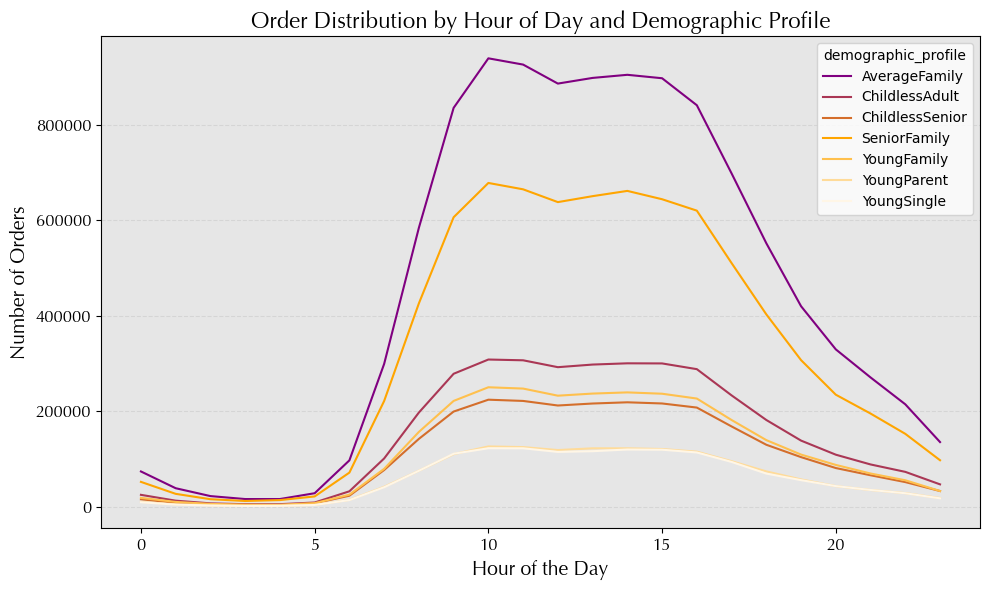

In [247]:
# Define custom colormap
colors = ['#800080', '#ffa500', '#fff6e6'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the line graph
line_cross_demographic_hours = cross_demographic_hours.plot(kind='line', figsize=(10, 6), cmap=custom_cmap)

# Set title and labels
plt.title('Order Distribution by Hour of Day and Demographic Profile', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Hour of the Day', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply common plot settings
set_plot_settings('vertical')

plt.show()

In [248]:
# Export line graph
line_cross_demographic_hours.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_line_cross_demographic_hours.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Peak ordering hours:** 

* Across all demographic profiles, the peak ordering hours appear to be between 8am and 10am, with a gradual increase in the number of orders starting at 6am and peaking at 9am. This trend suggests that many customers prefer to place their orders during the morning hours.

**Variations by demographic profile:** 

* There are variations in ordering patterns among different demographic profiles. For example, the 'AverageFamily' and 'SeniorFamily' profiles show higher order volumes during the morning hours compared to other profiles. In contrast, the 'YoungSingle' profile tends to have a lower order volume in the morning hours, but a more consistent order volume throughout the day.

**Late-night ordering:** 

* While the overall order volume decreases during late night hours (e.g., after midnight), there is still a noticeable number of orders placed, particularly by the 'YoungParent' and 'YoungSingle' profiles. This indicates that some customers from these profiles prefer to shop late at night.

**Ordering behavior throughout the day:** 

* The distribution of orders fluctuates throughout the day, with some profiles showing more pronounced peaks and valleys than others. For example, the 'YoungFamily' and 'YoungParent' profiles show relatively consistent order volumes throughout the day, while the 'ChildlessAdult' and 'ChildlessSenior' profiles show lower order volumes in the early morning hours, but a significant increase during peak hours.

Overall, the analysis highlights the differences in ordering habits across different demographic profiles and provides insight into the timing of peak order volumes throughout the day.

**_______________________________________________________________________________________________________________**

#### Day of the week

In [81]:
# Create crosstab of 'demographic_profile' and 'order_day_of_week'
cross_demographic_days = pd.crosstab(df_filtered['order_day_of_week'], df_filtered['demographic_profile'], dropna=False)

cross_demographic_days

demographic_profile,AverageFamily,ChildlessAdult,ChildlessSenior,SeniorFamily,YoungFamily,YoungParent,YoungSingle
order_day_of_week,,,,,,,
0,2082062,699681,502506,1513210,555432,280828,274891
1,1914968,641620,459198,1375156,499730,259482,261532
2,1424924,472906,343839,1030655,374180,192366,185836
3,1291816,432192,315320,945857,340402,174418,169530
4,1281472,426812,306704,929663,335386,173214,171743
5,1413771,480081,348434,1031534,378790,195460,185659
6,1516652,493500,369270,1103158,404893,205404,198427


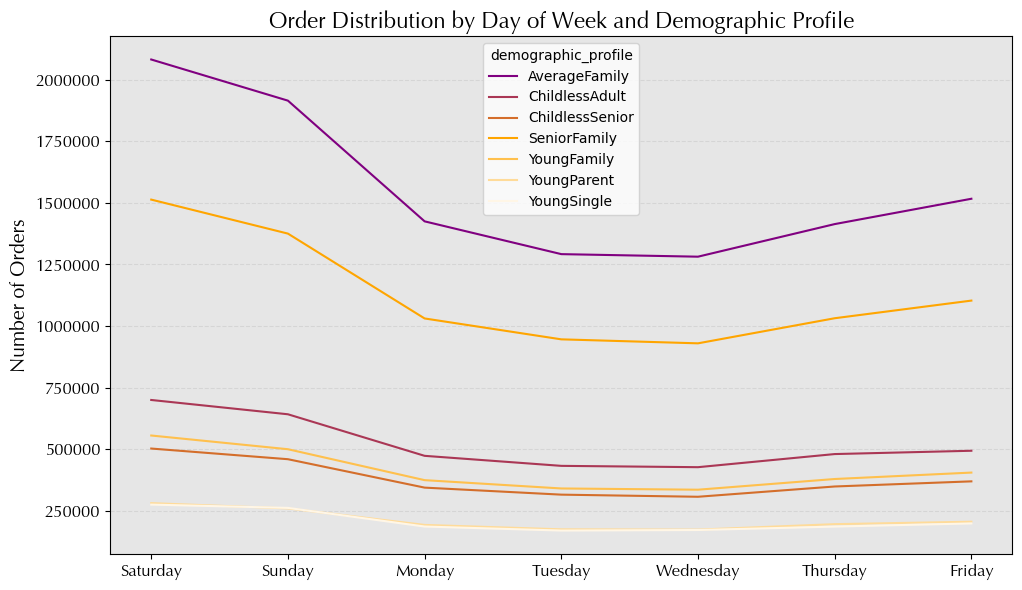

In [249]:
# Define custom colormap
colors = ['#800080', '#ffa500', '#fff6e6'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Define the day names
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Plot the line graph
line_cross_demographic_days = cross_demographic_days.plot(kind='line', figsize=(10, 6), cmap=custom_cmap)

# Set title and labels
plt.title('Order Distribution by Day of Week and Demographic Profile', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply common plot settings
set_plot_settings('vertical')

# Set custom tick labels
plt.xticks(range(7), day_names)

plt.show()

In [250]:
# Export line graph
line_cross_demographic_days.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_line_cross_demographic_days.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Weekend vs. weekday:**

* Across all demographic profiles, there is a noticeable increase in order volume on weekends (Saturday and Sunday) compared to weekdays. This trend suggests that many customers, regardless of demographic profile, prefer to do their grocery shopping on the weekend, perhaps due to more free time or family activities.

**Consistent patterns:**

* While there are differences in order volumes between different demographic profiles, the overall pattern of higher order volumes on weekends remains consistent. This suggests that the preference for weekend shopping is widespread across different demographic segments.


**Variations by profile:** 

* Some demographic profiles show slightly different order patterns throughout the week. For example, the 'AverageFamily' and 'SeniorFamily' profiles tend to have higher order volumes during the week than other profiles, possibly reflecting more structured routines or habits.

**Relative order volumes:**

* The graph shows the relative order volumes for each demographic profile on each day of the week. For example, the 'Average Family' profile consistently has the highest order volumes across all days of the week, followed by other profiles with varying order volumes.

Overall, the analysis highlights the differences in order patterns for different demographic profiles and provides insight into the timing of peak order volumes during the week and on weekends.

**_______________________________________________________________________________________________________________**

## 11.3 income_profile

### 11.3.1 Defining profile

In [56]:
%%time
# Bin 'income' column into income groups using .loc() statements
df_filtered.loc[df_filtered['income'] > 200000, 'income_profile'] = 'HighIncome'
df_filtered.loc[(df_filtered['income'] > 50000) & (df_filtered['income'] <= 200000), 'income_profile'] = 'MiddleIncome'
df_filtered.loc[df_filtered['income'] <= 50000, 'income_profile'] = 'LowIncome'

CPU times: user 815 ms, sys: 265 ms, total: 1.08 s
Wall time: 834 ms


In [84]:
# Check frequencies of new column 'income_profile'
df_filtered['income_profile'].value_counts(dropna=False)

income_profile
MiddleIncome    27347868
LowIncome        3362554
HighIncome        254142
Name: count, dtype: int64

### 11.3.2 Visualizing profile distribution

#### Relative order frequency

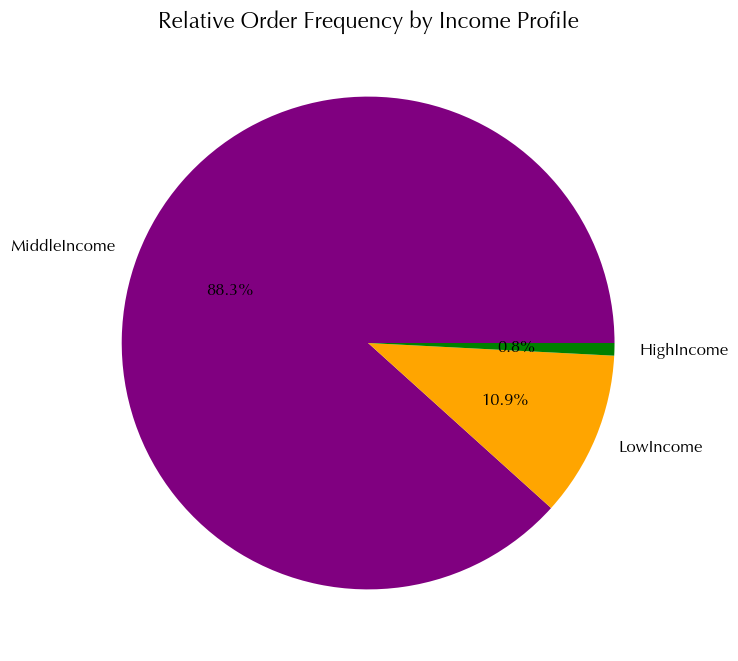

In [85]:
# Calculate the percentage values for each category
income_percentage = df_filtered['income_profile'].value_counts(normalize=True) * 100

# Plot the pie chart
pie_income_relative = income_percentage.plot(kind='pie', figsize=figsize, colors=[color_purple, color_orange, color_green], autopct='%1.1f%%')

# Set title and labels
plt.title('Relative Order Frequency by Income Profile', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label

# Set font size for percentage values inside the pie chart
for text in pie_income_relative.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()

In [86]:
# Export pie chart
pie_income_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_pie_income_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**High Income:** 

* Customers classified as High Income have the lowest order frequency, with a total of 254,142 orders. This suggests that a smaller proportion of orders come from higher income customers.

**Middle Income:**

* Customers classified as Middle Income have the highest order frequency, with a total of 27,347,868 orders. This indicates that a significant portion of orders come from middle income customers.

**Low Income:**

* Customers classified as Low Income have a lower order frequency than Middle Income customers, with a total of 3,362,554 orders. While still significant, this indicates that lower income customers place fewer orders overall.

Overall, there is a clear trend for order frequency to decrease as income level increases, with Middle Income customers contributing the most to the total number of orders.

**_______________________________________________________________________________________________________________**

#### Share of income by demographic profile

In [87]:
# Create crosstab of 'demographic_profile' and 'income_profile'
cross_demographic_income = pd.crosstab(df_filtered['demographic_profile'], df_filtered['income_profile'], dropna=False)

cross_demographic_income

income_profile,HighIncome,LowIncome,MiddleIncome
demographic_profile,,,
AverageFamily,89560,1191930,9644175
ChildlessAdult,34082,398257,3214453
ChildlessSenior,24427,210710,2410134
SeniorFamily,85301,662250,7181682
YoungFamily,10617,440912,2437284
YoungParent,4058,220542,1256572
YoungSingle,6097,237953,1203568


In [88]:
# Calculate the total income for each demographic profile
cross_demographic_income['Total'] = cross_demographic_income['HighIncome'] + cross_demographic_income['LowIncome'] + cross_demographic_income['MiddleIncome']

# Calculate the proportions of incomes
cross_demographic_income['Proportion high'] = cross_demographic_income['HighIncome'] / cross_demographic_income['Total'] * 100
cross_demographic_income['Proportion low'] = cross_demographic_income['LowIncome'] / cross_demographic_income['Total'] * 100
cross_demographic_income['Proportion middle'] = cross_demographic_income['MiddleIncome'] / cross_demographic_income['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_demographic_income = cross_demographic_income.sort_values(by='demographic_profile', ascending=True)

# Display the updated crosstab table with proportions
cross_demographic_income

income_profile,HighIncome,LowIncome,MiddleIncome,Total,Proportion high,Proportion low,Proportion middle
demographic_profile,,,,,,,
AverageFamily,89560,1191930,9644175,10925665,0.819721,10.909450,88.270828
ChildlessAdult,34082,398257,3214453,3646792,0.934575,10.920749,88.144676
ChildlessSenior,24427,210710,2410134,2645271,0.923421,7.965535,91.111043
SeniorFamily,85301,662250,7181682,7929233,1.075779,8.352006,90.572215
YoungFamily,10617,440912,2437284,2888813,0.367521,15.262739,84.369739
YoungParent,4058,220542,1256572,1481172,0.273972,14.889695,84.836332
YoungSingle,6097,237953,1203568,1447618,0.421175,16.437555,83.141271


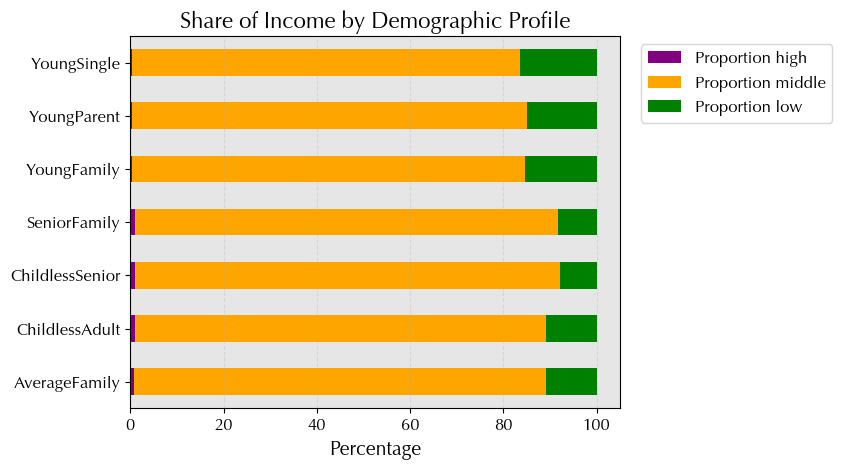

In [89]:
# Plot stacked bars with adjusted parameters
barh_demographic_income_relative = cross_demographic_income[['Proportion high', 'Proportion middle', 'Proportion low']].plot.barh(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Income by Demographic Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Percentage', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('') # Remove y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.45, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [90]:
# Export bar chart
barh_demographic_income_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_barh_demographic_income_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**AverageFamily, SeniorFamily, ChildlessAdult, and ChildlessSenior:**

* These profiles are predominantly middle-income earners, indicating stability in financial status. This could indicate that these groups are more established in their careers or have a stable financial situation.

**YoungFamily, YoungParent, and YoungSingle:**

* These profiles have a higher proportion of low-income earners than the others. This could indicate that these groups are either in the early stages of their careers, have lower-paying jobs, or face financial challenges such as supporting dependents or managing expenses on a single income.

**SeniorFamily:**

* Although this profile has a high proportion of middle-income earners, it also has a relatively high proportion of high-income earners compared to the other profiles. This suggests that this group may include retirees or individuals with significant savings or investments, leading to a more affluent status in their later years.

**YoungSingle:**

* This profile is characterized by a lower proportion of high-income earners compared to the others. This could indicate that individuals in this group, who are likely to be younger and possibly early in their careers, may have lower earning potential or face financial constraints associated with being single.

Overall, the analysis provides insights into the distribution of income across different demographic profiles, shedding light on the financial status and circumstances of different age and family groups.

**_______________________________________________________________________________________________________________**

### 11.3.3 Descriptive statistics

#### Usage frequency

In [91]:
# Print descriptive statistics
income_usage_freq = df_filtered.groupby('income_profile')['days_since_prior_order'].agg(['min', 'mean', 'max'])

income_usage_freq

,min,mean,max
income_profile,,,
HighIncome,0.0,10.093070,30.0
LowIncome,0.0,11.175807,30.0
MiddleIncome,0.0,10.772318,30.0


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* Across all income profiles (High, Low, and Middle), the minimum usage frequency is 0, reflecting the first purchase of each customer.

**Mean:** 

* On average, LowIncome customers have the highest mean usage frequency (11.18), followed by MiddleIncome customers (10.77), and HighIncome customers (10.09). This suggests that LowIncome customers tend to make slightly more orders compared to the other income groups.

**Maximum (max):**

* The maximum value for days since the prior order is consistently 30 for all income profiles. This indicates that some customers place orders exactly 30 days apart from their previous purchases, possibly indicating a monthly purchasing pattern.

Overall, there is consistency in the distribution of days since the prior order across different income profiles, with similar mean values and a maximum value of 30 days across the board.

**_______________________________________________________________________________________________________________**

#### Visualizing usage frequency

In [221]:
# Create crosstab of 'income_profile' and 'frequency_flag'
cross_income_freq = pd.crosstab(df_filtered['income_profile'], df_filtered['frequency_flag'], dropna=False)

cross_income_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_profile,,,
HighIncome,184172,16321,53649
LowIncome,2199082,376138,787334
MiddleIncome,18821222,2502516,6024130


In [222]:
# Calculate the total count of usage frequencies
cross_income_freq['Total'] = cross_income_freq['Frequent customer'] + cross_income_freq['Non-frequent customer'] + cross_income_freq['Regular customer']

# Calculate the proportions of customer frequencies
cross_income_freq['Proportion frequent'] = cross_income_freq['Frequent customer'] / cross_income_freq['Total'] * 100
cross_income_freq['Proportion non-frequent'] = cross_income_freq['Non-frequent customer'] / cross_income_freq['Total'] * 100
cross_income_freq['Proportion regular'] = cross_income_freq['Regular customer'] / cross_income_freq['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_income_freq = cross_income_freq.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_income_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer,Total,Proportion frequent,Proportion non-frequent,Proportion regular
income_profile,,,,,,,
MiddleIncome,18821222,2502516,6024130,27347868,68.82,9.15,22.03
LowIncome,2199082,376138,787334,3362554,65.40,11.19,23.41
HighIncome,184172,16321,53649,254142,72.47,6.42,21.11


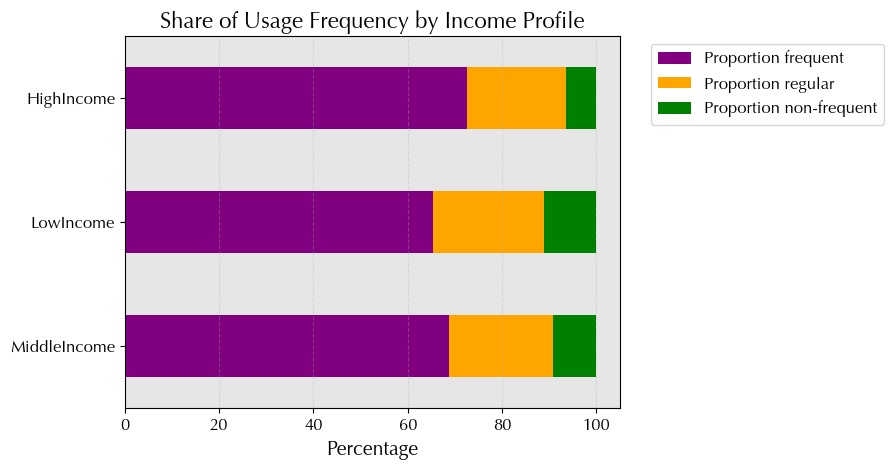

In [223]:
# Plot stacked bars with adjusted parameters
barh_income_freq_relative = cross_income_freq[['Proportion frequent', 'Proportion regular', 'Proportion non-frequent']].plot.barh(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Usage Frequency by Income Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Percentage', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('') # Remove y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.55, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [224]:
# Export bar chart
barh_income_freq_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_barh_income_freq_relative.png'), bbox_inches='tight')

#### **_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**HighIncome:** 
* The highest proportion of orders comes from frequent customers, accounting for 72.47% of total orders. Non-frequent and regular customers account for 6.42% and 21.11% of orders respectively.

**MiddleIncome:** 
* The majority of customers fall into the frequent customer category, accounting for 68.82% of total orders. Non-frequent and regular customers account for 9.15% and 22.03% of orders, respectively.

**LowIncome:** 
* Similar to middle-income customers, the majority are frequent customers, accounting for 65.40% of orders. Non-frequent and regular customers account for 11.19% and 23.41% of orders, respectively.

Overall, there's a tendency for the majority of orders in each income profile to come from frequent customers, suggesting that income level correlates with order frequency, with high-income customers having the highest proportion of frequent orders.

**_______________________________________________________________________________________________________________**

#### Expenditure

In [210]:
# Print descriptive statistics
income_prices = df_filtered.groupby('income_profile')['prices'].agg(['min', 'mean', 'max'])

income_prices

,min,mean,max
income_profile,,,
HighIncome,1.00,7.78,25.00
LowIncome,1.00,6.71,25.00
MiddleIncome,1.00,7.92,25.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* All income profiles have a minimum price of 1.00, indicating the availability of products at a low price point across all income segments.

**Mean:** 

* The mean prices vary slightly across income profiles. LowIncome customers have the lowest mean price of 6.71, while MiddleIncome customers have the highest mean price of 7.92. HighIncome customers fall in between, with a mean price of 7.78.

**Maximum (max):**

* The maximum price remains consistent at 25.00 across all income profiles, suggesting that high-priced products are available to customers across different income levels.

Overall, there are slight differences in mean prices among income profiles, but the distribution of prices remains relatively consistent, with all income groups having access to products at various price ranges.

**_______________________________________________________________________________________________________________**

### 11.3.4 Comparison across departments

#### Determing Top 5 departments

In [97]:
# Group by income_profile and department, then get the value_counts
income_department_counts = df_filtered.groupby(['income_profile', 'department']).size()

# Unstack the dataframe to make income_profile the columns
income_department_counts = income_department_counts.unstack(level=0)

# Select only the top 5 departments for each income profile
income_top5 = income_department_counts.apply(lambda x: x.nlargest(5))

# Reorder the columns in the DataFrame
income_top5 = income_top5[['LowIncome', 'MiddleIncome', 'HighIncome']]

income_top5

income_profile,LowIncome,MiddleIncome,HighIncome
department,,,
beverages,383121,2164119,24661
dairy eggs,502363,4630512,44307
frozen,215177,1886702,19852
produce,826314,8203566,49393
snacks,559529,2183925,22952


#### Visualizing Top 5 departments

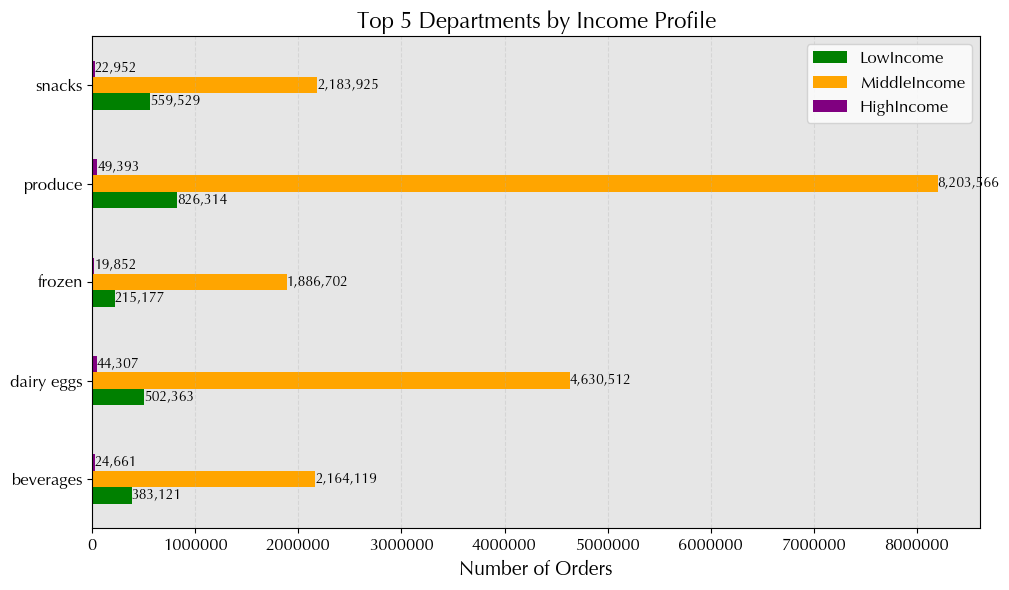

In [98]:
# Plot the grouped bar chart
bar_income_top5 = income_top5.plot(kind='barh', color=[color_green, color_orange, color_purple], figsize=(10, 6))

# Set title and labels
plt.title('Top 5 Departments by Income Profile', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

for i in bar_income_top5.patches:
    # Get the coordinates of the bar
    x = i.get_width()
    y = i.get_y() + i.get_height() / 2
    
    # Add the value to the bar
    bar_income_top5.text(x, y, f'{x:,.0f}', ha='left', va='center', fontname=fontname, fontsize=10)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend)
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [99]:
# Export bar chart
bar_income_top5.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_bar_income_top5.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

Overall, the top 5 department categories—beverages, dairy eggs, frozen, produce, and snacks—are consistent across all three income profiles: HighIncome, LowIncome, and MiddleIncome. While there are differences in the frequency of ordering these departments among the income profiles, the same categories appear as the most frequently ordered items regardless of income level. This suggests that these department categories are essential and commonly purchased by customers across different income profiles.

**_______________________________________________________________________________________________________________**

### 11.3.5 Comparison across price ranges

#### Calculating share of price ranges

In [100]:
# Create crosstab of 'income_profile' and 'price_range'
cross_income_prices = pd.crosstab(df_filtered['income_profile'], df_filtered['price_range'], dropna=False)

cross_income_prices

price_range,High-range product,Low-range product,Mid-range product
income_profile,,,
HighIncome,5992,78883,169267
LowIncome,17665,1390774,1954115
MiddleIncome,374296,8205183,18768389


In [101]:
# Calculate the total count of price ranges for each income profile
cross_income_prices['Total'] = cross_income_prices['High-range product'] + cross_income_prices['Low-range product'] + cross_income_prices['Mid-range product']

# Calculate the proportions of price ranges
cross_income_prices['Proportion high'] = cross_income_prices['High-range product'] / cross_income_prices['Total'] * 100
cross_income_prices['Proportion low'] = cross_income_prices['Low-range product'] / cross_income_prices['Total'] * 100
cross_income_prices['Proportion mid'] = cross_income_prices['Mid-range product'] / cross_income_prices['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_income_prices = cross_income_prices.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_income_prices

price_range,High-range product,Low-range product,Mid-range product,Total,Proportion high,Proportion low,Proportion mid
income_profile,,,,,,,
MiddleIncome,374296,8205183,18768389,27347868,1.368648,30.003008,68.628344
LowIncome,17665,1390774,1954115,3362554,0.525345,41.360644,58.114011
HighIncome,5992,78883,169267,254142,2.357737,31.038947,66.603316


#### Visualizing share of price ranges

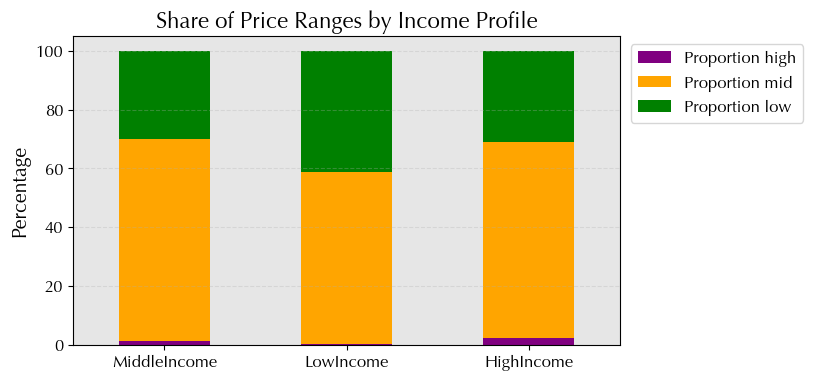

In [251]:
# Plot stacked bars with adjusted parameters
bar_income_prices_relative = cross_income_prices[['Proportion high', 'Proportion mid', 'Proportion low']].plot.bar(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Price Ranges by Income Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Percentage', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.35, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [252]:
# Export bar chart
bar_income_prices_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_bar_income_prices_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**MiddleIncome Profile:**

* The high proportion of mid-range products (68.63%) suggests that customers in this income bracket prefer products that offer a balance between quality and affordability. They are likely to prioritize value for money when making purchasing decisions.
* The relatively low share of high-range products (1.37%) suggests that customers in this profile may be less inclined to spend on luxury or premium items. They may prioritize practicality and cost-effectiveness over luxury.

**LowIncome Profile:**

* Despite being in a lower income bracket, customers still allocate a significant portion of their spending to mid-range products (58.11%). This suggests that they prioritize products that offer reasonable quality without stretching their budget too far.
* The relatively low share of high-range products (0.53%) reinforces the notion that customers in this profile are more budget-conscious and may prioritize essential items over luxury or premium products.

**HighIncome Profile:**

* The dominance of mid-range products (66.60%) among high-income customers may indicate a preference for products that offer good quality without excessive cost. While they have the means to afford luxury items, they may opt for more practical choices.
* The significant share of low-range products (31.04%) suggests that even high-income customers are price-sensitive and value-conscious. They may look for cost-effective options and prioritize value for money, even if they can afford higher-priced alternatives.

In summary, these figures reflect the different preferences and spending patterns of different income profiles, highlighting different priorities in terms of product quality, affordability, and value.

**_______________________________________________________________________________________________________________**

### 11.3.6 Comparing spendings

#### Calculating share of spendings

In [202]:
# Create crosstab of 'income_profile' and 'spending_flag'
cross_income_spend = pd.crosstab(df_filtered['income_profile'], df_filtered['spending_flag'], dropna=False)

cross_income_spend

spending_flag,High spender,Low spender
income_profile,,
HighIncome,254142,0
LowIncome,2026,3360528
MiddleIncome,347257,27000611


In [204]:
# Calculate the total count of spendings for each income profile
cross_income_spend['Total'] = cross_income_spend['High spender'] + cross_income_spend['Low spender']

# Calculate the proportions of spendings
cross_income_spend['Proportion high'] = cross_income_spend['High spender'] / cross_income_spend['Total'] * 100
cross_income_spend['Proportion low'] = cross_income_spend['Low spender'] / cross_income_spend['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_income_spend = cross_income_spend.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_income_spend

spending_flag,High spender,Low spender,Total,Proportion high,Proportion low
income_profile,,,,,
MiddleIncome,347257,27000611,27347868,1.27,98.73
LowIncome,2026,3360528,3362554,0.06,99.94
HighIncome,254142,0,254142,100.00,0.00


#### Visualizing share of spendings

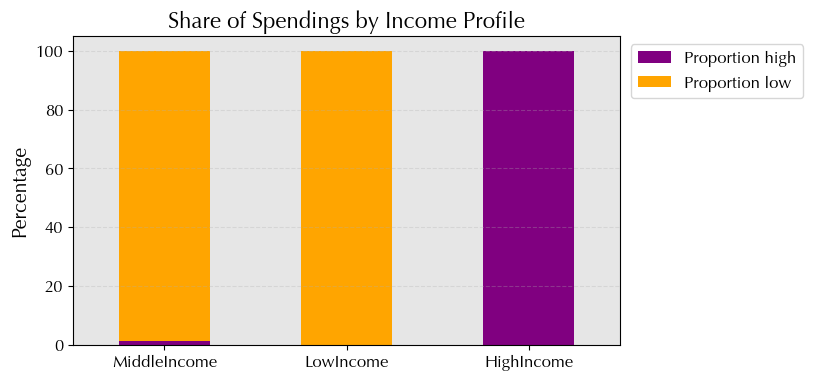

In [253]:
# Plot stacked bars with adjusted parameters
bar_income_spend_relative = cross_income_spend[['Proportion high', 'Proportion low']].plot.bar(stacked=True, color=[color_purple, color_orange])

# Set labels and title
plt.title('Share of Spendings by Income Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Percentage', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.35, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [254]:
# Export bar chart
bar_income_spend_relative.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_bar_income_spend_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Middle income:**

* There is a significant number of individuals categorized as low spenders (approximately 98.73%).
* Only a small portion of individuals fall into the 'High Spender' category (about 1.27%).

**Low income:**

* Nearly all individuals in the low income category are classified as low spenders (about 99.94%).
* There is a negligible number of individuals classified as high spenders in the low income category (about 0.06%).

**High income:**

* All individuals in the high income category are classified as high spenders (100.00%).
* There are no individuals classified as low spenders in the high income category (0.00%).

These observations indicate a clear correlation between income level and spending behavior. High income individuals tend to spend more, while low income individuals tend to be low spenders. Middle-income individuals exhibit a mix of spending behaviors, but the majority tend to be low spenders.

**_______________________________________________________________________________________________________________**

**_______________________________________________________________________________________________________________**

#### <mark>Comparison</mark>

When comparing the proportions of price ranges by income profile and customer spending patterns, several relationships can be observed:

**High-income customers:**

* High-income customers have the highest share of high-price products (2.36%) and are exclusively in the high-spending category.
* This indicates that high-income customers are more likely to purchase high-priced items and are willing to spend more on their grocery shopping.

**Middle-income shoppers:**

* Middle-income customers have a moderate share of high-priced products (1.37%) and are split between high and low spenders.
* While some middle-income customers are high spenders, a significant portion choose lower-priced products, suggesting a more diverse spending pattern.

**Low-income customers:**

* Low-income customers have the smallest share of high-priced products (0.53%) and are predominantly in the low-spending category.
* This suggests that low-income customers tend to prioritize lower-priced items and are more conservative in their spending habits compared to higher-income groups.

Overall, there is a clear correlation between income profile, the proportion of high-value products purchased, and spending patterns. Higher-income customers tend to purchase higher-priced products and are more likely to be high spenders, while lower-income customers tend to purchase lower-priced products and are more conservative in their spending.

**_______________________________________________________________________________________________________________**

## 11.4 time_profile

### 11.4.1 Defining profile

In [57]:
%%time
# Aggregate data for each user ID
user_data_agg = df_filtered.groupby('user_id').agg({
    'order_day_of_week': lambda x: x.mode().iloc[0],  # Most common day of the week
    'order_hour_of_day': lambda x: x.mode().iloc[0],  # Most common hour of the day
}).reset_index()

# Get day and hour groups using .loc statements
user_data_agg.loc[user_data_agg['order_day_of_week'].isin([0, 1]), 'day_group'] = 'Weekend'
user_data_agg.loc[~user_data_agg['order_day_of_week'].isin([0, 1]), 'day_group'] = 'Weekday'
user_data_agg.loc[(6 <= user_data_agg['order_hour_of_day']) & (user_data_agg['order_hour_of_day'] <= 12), 'hour_group'] = 'Morning'
user_data_agg.loc[(13 <= user_data_agg['order_hour_of_day']) & (user_data_agg['order_hour_of_day'] <= 20), 'hour_group'] = 'Afternoon'
user_data_agg.loc[(user_data_agg['order_hour_of_day'] < 6) | (user_data_agg['order_hour_of_day'] > 20), 'hour_group'] = 'LateNight'

# Combine profile components
user_data_agg['time_profile'] = user_data_agg['day_group'] + '_' + user_data_agg['hour_group'] + '_Shopper'

# Merge the profiles back to the original data
df_filtered = df_filtered.merge(user_data_agg[['user_id', 'time_profile']], on='user_id', how='left')

CPU times: user 40.7 s, sys: 47.5 s, total: 1min 28s
Wall time: 1min 53s


In [108]:
# Check frequencies of new column 'time_profile'
df_filtered['time_profile'].value_counts(dropna=False)

time_profile
Weekday_Afternoon_Shopper    8000578
Weekday_Morning_Shopper      7262602
Weekend_Afternoon_Shopper    7196405
Weekend_Morning_Shopper      6998107
Weekday_LateNight_Shopper     860265
Weekend_LateNight_Shopper     646607
Name: count, dtype: int64

### 11.4.2 Visualizing profile distribution

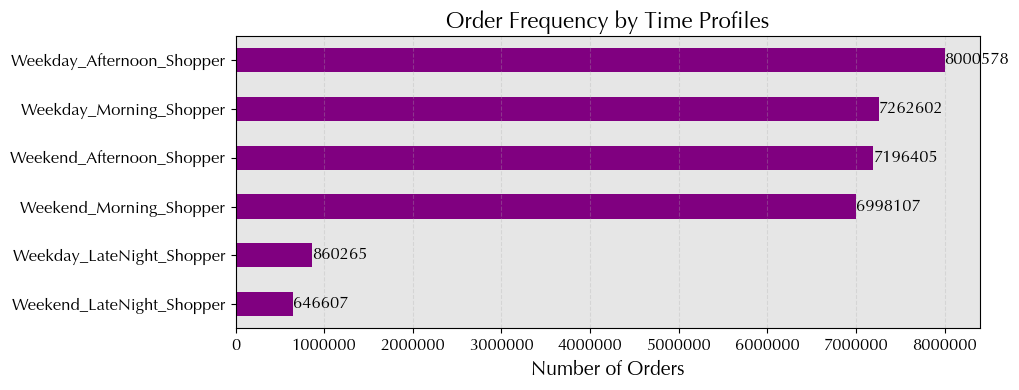

In [109]:
# Set plot size
plt.figure(figsize=(10, 4))

# Plot the horizontal bar chart
barh_time_profile = df_filtered['time_profile'].value_counts(ascending=True).plot(kind='barh', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Time Profiles', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Add values to the bars
for index, value in enumerate(df_filtered['time_profile'].value_counts(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontname=fontname, fontsize=fontsize_tick)

plt.show()

In [110]:
# Export bar chart
barh_time_profile.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_barh_time_profile.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Weekday afternoon shoppers:**

* Weekday afternoon shoppers have the highest order frequency with a total of 8,000,578 orders. This indicates that weekday afternoons are a popular time for this customer segment to shop.

**Weekday morning shoppers:**

* Close behind, weekday morning shoppers have a significant order frequency, with a total of 7,262,602 orders. This suggests that weekday mornings are also a busy time for shopping.

**Weekend afternoon shoppers:**

* Customers who prefer to shop in the afternoon on weekends have a significant order frequency, with a total of 7,196,405 orders. This indicates that weekends, especially afternoons, are a popular time for this customer segment to shop.

**Weekend Morning Shoppers:**

* Similar to weekday mornings, weekend morning shoppers also have a significant order frequency, with a total of 6,998,107 orders. This suggests that mornings are a preferred time to shop, regardless of the day.

**Weekday Late Night Shoppers:**

* Weekday late night shoppers have a lower order frequency compared to other time profiles, with a total of 860,265 orders. Weekday late night shopping is less popular with this customer segment.

**Weekend Late Night Shopper:**

* Similarly, weekend late night shoppers have a relatively low order frequency, with a total of 646,607 orders. This suggests that late night shopping on weekends is less busy than other times.

Overall, there are clear trends in order frequency across different time profiles, with weekday afternoons and weekday mornings being the busiest times for shopping, followed by weekends. Late nights, both weekdays and weekends, have lower order frequencies.

**_______________________________________________________________________________________________________________**

### 11.4.3 Descriptive statistics

#### Usage frequency

In [111]:
# Print descriptive statistics
time_usage_freq = df_filtered.groupby('time_profile')['days_since_prior_order'].agg(['min', 'mean', 'max'])

time_usage_freq

,min,mean,max
time_profile,,,
Weekday_Afternoon_Shopper,0.0,11.166565,30.0
Weekday_LateNight_Shopper,0.0,11.186870,30.0
Weekday_Morning_Shopper,0.0,10.487256,30.0
Weekend_Afternoon_Shopper,0.0,11.321048,30.0
Weekend_LateNight_Shopper,0.0,11.038415,30.0
Weekend_Morning_Shopper,0.0,10.153728,30.0


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* Across all time profiles, the minimum frequency is 0.00, reflecting the first purchase of each customer.

**Mean:** 

* The mean usage frequency varies among different time profiles, with the highest mean observed for the 'Weekday Afternoon Shopper' group. This indicates that customers who shop in the afternoon on weekdays tend to place orders more frequently on average. On the other hand, the 'Weekend Morning Shopper' group has the lowest mean usage frequency, suggesting less frequent order placements during weekend mornings.

**Maximum (max):**

* The maximum frequency is consistent at 30.00 across all time profiles. This indicates that some customers place orders exactly 30 days apart from their previous purchases, possibly indicating a monthly purchasing pattern.

Overall, there are variations in mean frequencies across different time profiles, indicating that customers tend to exhibit different ordering habits depending on the time of day.

**_______________________________________________________________________________________________________________**

#### Expenditure

In [212]:
# Print descriptive statistics
time_prices = df_filtered.groupby('time_profile')['prices'].agg(['min', 'mean', 'max'])

time_prices

,min,mean,max
time_profile,,,
Weekday_Afternoon_Shopper,1.00,7.79,25.00
Weekday_LateNight_Shopper,1.00,7.82,25.00
Weekday_Morning_Shopper,1.00,7.75,25.00
Weekend_Afternoon_Shopper,1.00,7.84,25.00
Weekend_LateNight_Shopper,1.00,7.83,25.00
Weekend_Morning_Shopper,1.00,7.77,25.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* The minimum price for all time profiles is consistently \$1.00, indicating that customers across different time profiles purchase items at similar lower price points.

**Mean:** 

* The mean price varies slightly among different time profiles, with the highest mean observed for the 'Weekend Afternoon Shopper' group. This suggests that customers who shop in the afternoon on weekends tend to spend slightly more on average per order compared to other time profiles.

**Maximum (max):**

* The maximum price represents the highest price of items purchased within each time profile. The maximum price is consistent at \\$25.00 across all time profiles, indicating that there are high-priced items available for purchase regardless of the time profile.

Overall, the descriptive statistics suggest that while there are slight variations in mean spending across different time profiles, the range of prices and the availability of high-priced items remain relatively consistent across all time profiles.

**_______________________________________________________________________________________________________________**

# 11.5 special goods

### 11.5.1 Defining profile

In [58]:
%%time
# Aggregate data for each user ID
user_data_agg = df_filtered.groupby('user_id')['department'].agg(list).reset_index()

# Assign profiles based on aggregated user data
def assign_profile(departments):
    profile = ''
    if 'babies' in departments:
        profile += 'HasBaby' + '_'
    if 'pets' in departments:
        profile += 'PetOwner' + '_'
    if all(department not in departments for department in ['meat seafood', 'dairy eggs']):
        profile += 'VeganVegetarian' + '_'
    return profile[:-1] if profile else 'None'

# Apply the profile assignment function to each group
user_data_agg['special_goods'] = user_data_agg['department'].apply(assign_profile)

# Merge the profiles back to the original data
df_filtered = df_filtered.merge(user_data_agg[['user_id', 'special_goods']], on='user_id', how='left')

CPU times: user 29 s, sys: 50.3 s, total: 1min 19s
Wall time: 1min 48s


In [113]:
# Check frequencies of new column 'special_goods'
df_filtered['special_goods'].value_counts(dropna=False)

special_goods
None                                18568819
HasBaby                              8643509
PetOwner                             2290512
HasBaby_PetOwner                     1151728
VeganVegetarian                       286871
HasBaby_VeganVegetarian                14014
PetOwner_VeganVegetarian                8109
HasBaby_PetOwner_VeganVegetarian        1002
Name: count, dtype: int64

In [114]:
# Calculate relative frequencies
special_goods_relative = (df_filtered['special_goods'].value_counts() / df_filtered['special_goods'].count()) * 100

special_goods_relative

special_goods
None                                59.967965
HasBaby                             27.914196
PetOwner                             7.397204
HasBaby_PetOwner                     3.719503
VeganVegetarian                      0.926449
HasBaby_VeganVegetarian              0.045258
PetOwner_VeganVegetarian             0.026188
HasBaby_PetOwner_VeganVegetarian     0.003236
Name: count, dtype: float64

### 11.5.2 Visualizing profile distribution

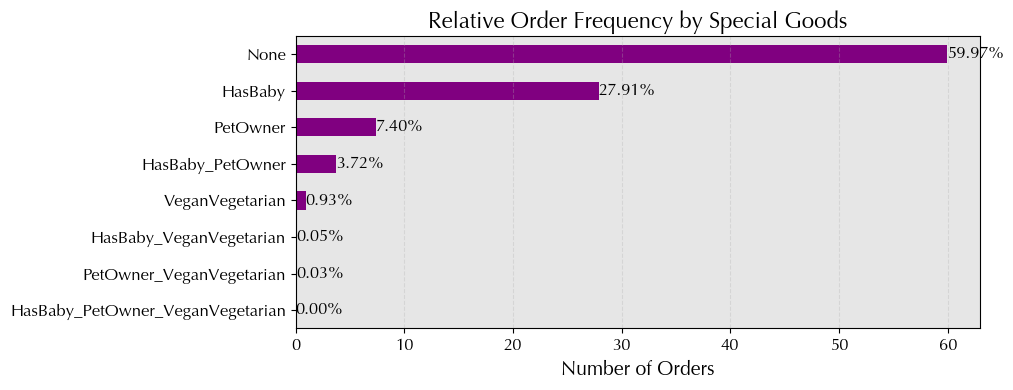

In [115]:
# Sort by descending order of relative frequencies
special_goods_relative = special_goods_relative.sort_values(ascending=True)

# Set plot size
plt.figure(figsize=(10, 4))

# Plot the horizontal bar chart
barh_special_goods = special_goods_relative.plot(kind='barh', color=color_purple)

# Set title and labels
plt.title('Relative Order Frequency by Special Goods', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Add percentage values to the bars
for index, value in enumerate(special_goods_relative):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontname=fontname, fontsize=fontsize_tick)

plt.show()

In [116]:
# Export bar chart
barh_special_goods.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '10_barh_special_goods.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

The observations provide insights into the distribution of special goods among orders, indicating that a significant portion of orders do not contain any special goods from the defined categories, while orders with items for babies are relatively more common compared to other combinations of special goods.

**_______________________________________________________________________________________________________________**

### 11.5.3 Descriptive statistics

#### Usage frequency

In [117]:
# Print descriptive statistics
goods_usage_freq = df_filtered.groupby('special_goods')['days_since_prior_order'].agg(['min', 'mean', 'max'])

goods_usage_freq

,min,mean,max
special_goods,,,
HasBaby,0.0,9.433496,30.0
HasBaby_PetOwner,0.0,8.755212,30.0
HasBaby_PetOwner_VeganVegetarian,0.0,17.337431,30.0
HasBaby_VeganVegetarian,0.0,12.640476,30.0
None,0.0,11.535701,30.0
PetOwner,0.0,10.896576,30.0
PetOwner_VeganVegetarian,0.0,13.933081,30.0
VeganVegetarian,0.0,13.841853,30.0


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* Across all special goods profiles, the minimum frequency is 0.00, reflecting the first purchase of each customer.

**Mean:** 

* The mean usage frequency varies noticeably among different special goods profiles. For instance, the 'HasBaby_PetOwner_VeganVegetarian' profile has the highest mean usage frequency of 17.34, indicating that, on average, customers in this group tend to place more orders compared to other special goods profiles. Conversely, the 'HasBaby' profile has a mean usage frequency of 9.43, which is notably lower than that of the 'HasBaby_PetOwner_VeganVegetarian' group.
* The range of mean usage frequency across special goods profiles suggests that customers' ordering habits differ significantly based on the combination of special goods associated with their profiles.

**Maximum (max):**

* The maximum frequency is consistent at 30.00 across all special goods profiles. This indicates that some customers place orders exactly 30 days apart from their previous purchases, possibly indicating a monthly purchasing pattern.

Overall, the descriptive statistics suggest that there are variations in usage frequency among different special goods profiles, with some profiles showing higher average usage frequency than others.

**_______________________________________________________________________________________________________________**

#### Expenditure

In [213]:
# Print descriptive statistics
goods_prices = df_filtered.groupby('special_goods')['prices'].agg(['min', 'mean', 'max'])

goods_prices

,min,mean,max
special_goods,,,
HasBaby,1.00,7.84,25.00
HasBaby_PetOwner,1.00,7.79,25.00
HasBaby_PetOwner_VeganVegetarian,1.10,7.43,14.90
HasBaby_VeganVegetarian,1.00,7.41,15.00
None,1.00,7.78,25.00
PetOwner,1.00,7.83,25.00
PetOwner_VeganVegetarian,1.00,7.39,15.00
VeganVegetarian,1.00,6.92,20.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* The minimum prices for products associated with different special goods profiles range from 1.00 to 1.10. This indicates that, regardless of the special goods profile, there are products available at relatively low price points.

**Mean:** 

* The mean price varies across different special goods profiles. For example, customers in the 'VeganVegetarian' profile have the lowest mean price of 6.92, while those in the 'HasBaby_PetOwner' profile have a slightly higher mean price of 7.79.

**Maximum (max):**

* The maximum price also varies among the special goods profiles, with the 'HasBaby_PetOwner_VeganVegetarian' profile having the lowest maximum price of 14.90 and the 'VeganVegetarian' profile having the highest maximum price of 20.00.

Overall, there are noticeable differences in both mean and maximum prices across different special goods profiles, indicating variations in purchasing behavior and preferences among customers with different special goods profiles.

**_______________________________________________________________________________________________________________**

# 12. Exporting data

In [256]:
# Check the output
df_filtered.shape

(30964564, 36)

In [255]:
%%time
# Export df_filtered as "orders_products_customers_merged(2).pkl" 
df_filtered.to_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'orders_products_customers_merged(2).pkl'))

CPU times: user 27 s, sys: 37.9 s, total: 1min 4s
Wall time: 1min 32s
